# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import rcParams
from matplotlib import ticker
rcParams['figure.dpi'] = 150

In [177]:
# Читаем данные
X_train = pd.read_csv('train_features_with_answers.csv')

In [178]:
# Про характеристики прочитайте в источнике
X_train.head(5)

school sex   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     MS   M   NaN       U     LE3       T     1     3   at_home  services   
1     GP   M   NaN       R     LE3       T     3     3   teacher     other   
2     GP   M  15.0     NaN     GT3       T     3     4     other     other   
3     MS   M  17.0       R     GT3       T     4     3  services     other   
4     GP   F  20.0       R     GT3       T     2     1     other     other   

   ... internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...      yes      yes       4         3      3    2    3      3        0   
1  ...      yes       no       3         3      4    3    5      3       16   
2  ...      yes       no       5         5      1    1    1      5        0   
3  ...      yes      yes       4         5      5    1    3      2        4   
4  ...      yes      yes       1         2      3    1    2      2        8   

   G3  
0   9  
1  12  
2  13  
3  11  
4  12  

[5 rows x 31 columns]

In [179]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      454 non-null    object 
 1   sex         454 non-null    object 
 2   age         426 non-null    float64
 3   address     449 non-null    object 
 4   famsize     454 non-null    object 
 5   Pstatus     454 non-null    object 
 6   Medu        454 non-null    int64  
 7   Fedu        454 non-null    int64  
 8   Mjob        454 non-null    object 
 9   Fjob        454 non-null    object 
 10  reason      454 non-null    object 
 11  guardian    454 non-null    object 
 12  traveltime  454 non-null    int64  
 13  studytime   454 non-null    int64  
 14  failures    454 non-null    int64  
 15  schoolsup   454 non-null    object 
 16  famsup      454 non-null    object 
 17  paid        454 non-null    object 
 18  activities  454 non-null    object 
 19  nursery     454 non-null    o

In [180]:
X_train.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  426.000000  454.000000  454.000000  454.000000  454.000000  454.000000   
mean    17.922535    2.493392    2.297357    1.599119    1.889868    0.229075   
std     13.417850    1.121218    1.076394    0.776361    0.811742    0.598335   
min     -1.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max    181.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  454.000000  454.000000  454.000000  454.000000  454.000000  454.000000   
mean     3.909692    3.182819    3.222467    1.519824    2.303965    3.541850   
std      0.950540    1.077387    1.181658    0.962110    1.313920    1.445633   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G3  
count  454.000000  454.000000  
mean     3.678414   11.825991  
std      4.591731    3.185665  
min      0.000000    0.000000  
25%      0.000000   10.000000  
50%      2.000000   12.000000  
75%      6.000000   14.000000  
max     32.000000   19.000000

In [181]:
index = X_train[X_train.isna().any(axis=1)].index
X_train[X_train.index.isin(index)]

school sex   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       MS   M   NaN       U     LE3       T     1     3   at_home  services   
1       GP   M   NaN       R     LE3       T     3     3   teacher     other   
2       GP   M  15.0     NaN     GT3       T     3     4     other     other   
10      MS   M  15.0     NaN     LE3       T     4     1    health  services   
20      MS   F   NaN       R     GT3       T     2     3   at_home  services   
21      GP   M  17.0     NaN     LE3       T     1     1     other  services   
22      GP   F  16.0     NaN     GT3       T     1     2     other     other   
23      GP   F  15.0     NaN     GT3       T     4     4   teacher  services   
31      GP   F   NaN       U     LE3       T     3     3     other     other   
45      GP   M   NaN       U     GT3       T     4     4   teacher  services   
65      GP   F   NaN       U     GT3       T     2     1  services     other   
66      GP   F   NaN       U     LE3       A     3     3     other  services   
69      MS   M   NaN       R     LE3       T     3     2  services     other   
84      MS   M   NaN       R     GT3       T     2     2     other     other   
85      GP   M   NaN       U     GT3       T     1     0     other     other   
86      MS   F   NaN       R     GT3       T     3     1   at_home     other   
113     GP   F   NaN       U     GT3       T     2     3   at_home     other   
138     GP   M   NaN       U     GT3       T     4     2   teacher     other   
162     GP   M   NaN       U     GT3       T     4     3   teacher     other   
192     GP   M   NaN       R     GT3       T     3     3  services  services   
207     GP   F   NaN       R     GT3       T     3     3  services     other   
238     GP   M   NaN       R     GT3       T     4     3  services     other   
274     GP   M   NaN       U     LE3       T     4     4   teacher     other   
316     GP   M   NaN       R     GT3       T     3     2   at_home  services   
365     GP   M   NaN       R     GT3       T     4     4   teacher   teacher   
371     GP   F   NaN       U     LE3       T     2     2     other     other   
372     MS   F   NaN       R     GT3       A     2     2    health     other   
373     GP   M   NaN       R     GT3       T     2     2  services     other   
374     GP   F   NaN       U     GT3       T     1     3   at_home  services   
375     GP   F   NaN       U     GT3       T     1     1     other     other   
376     GP   M   NaN       U     LE3       A     4     2    health    health   
377     GP   F   NaN       U     GT3       T     4     3    health  services   
378     GP   M   NaN       U     LE3       A     4     3  services   at_home   

     ... internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0    ...      yes      yes       4         3      3    2    3      3        0   
1    ...      yes       no       3         3      4    3    5      3       16   
2    ...      yes       no       5         5      1    1    1      5        0   
10   ...      yes       no       5         3      4    1    2      2        0   
20   ...      yes       no       3         3      3    1    1      2        0   
21   ...       no      yes       5         3      5    1    5      5        0   
22   ...      yes       no       5         3      5    1    2      5        4   
23   ...      yes       no       4         2      2    1    1      5        2   
31   ...      yes       no       4         4      5    1    1      4        0   
45   ...      yes       no       4         3      3    2    2      2        0   
65   ...      yes       no       4         3      5    2    4      4        4   
66   ...      yes       no       2         3      5    1    4      3        6   
69   ...      yes       no       4         4      1    3    4      5        4   
84   ...       no      yes       5         5      5    3    5      5        0   
85   ...      yes      yes       4         3      2    1    1      3

In [182]:
# X_train.fillna({'age': np.round(X_train['age'].mean())}, inplace=True)
# X_train.fillna({'address': X_train['address'].mode(dropna=True)[0]}, inplace=True)

In [183]:
# X_train[X_train.index.isin(index)]

В начальных данных были пропущены возраст (28 значений) и адрес (5 значений). ~~Так как в этот раз данных не так много, то решил восстановить данные, используя среднее (для возраста) и медиану (для адреса). Была идея использовать кластеризацию для заполнения данных, но в итоге решил от неё отказаться, так как для этого нужно делать категориальные признаки вещественными.~~

## Пояснение
Мне честно не очень нравится идея изучать необработанные данные.
Как по мне, это сбивает с толку и может повлечь ошибочные выводы.
В первом своем решении я решил, что наверное все-таки нужно почистить данные, перед их обработкой, но в итоге я сдался и моих нервов не хватило, поэтому я решил переделать домашку, не очищая данные. На мой взгляд, на будущее стоит сначала ставить часть с очищением и заполнением пропусков, а только потом изучать данные 😔

# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ.

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки.

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
sns.set_theme()

## Характеристика: "Sex"

### Уникальные значения

In [186]:
X_train['sex'].unique()

array(['M', 'F', 'D', 'C', 'B', 'A'], dtype=object)

Получаются какие-то трансформеры, поэтому сначала мы посмотрим, сколько приходится людей на странные полы

In [187]:
X_train['sex'].value_counts()

sex
F    257
M    189
D      5
C      1
B      1
A      1
Name: count, dtype: int64

Видим, что на трансформеров приходится всего 8 записей, ~~поэтому выкинем их~~

In [188]:
# gender_error_index = X_train[X_train['sex'].isin(['A', 'B', 'C', 'D'])].index
# X_train.drop(index=gender_error_index, inplace=True)

Теперь намного приятнее работать с данными.

Посмотрим процентное соотношение мужского и женского пола

<Axes: ylabel='count'>

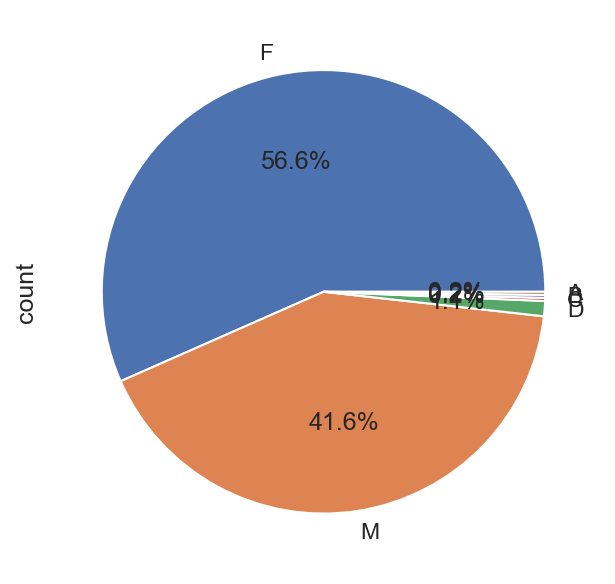

In [189]:
X_train['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='sex'>

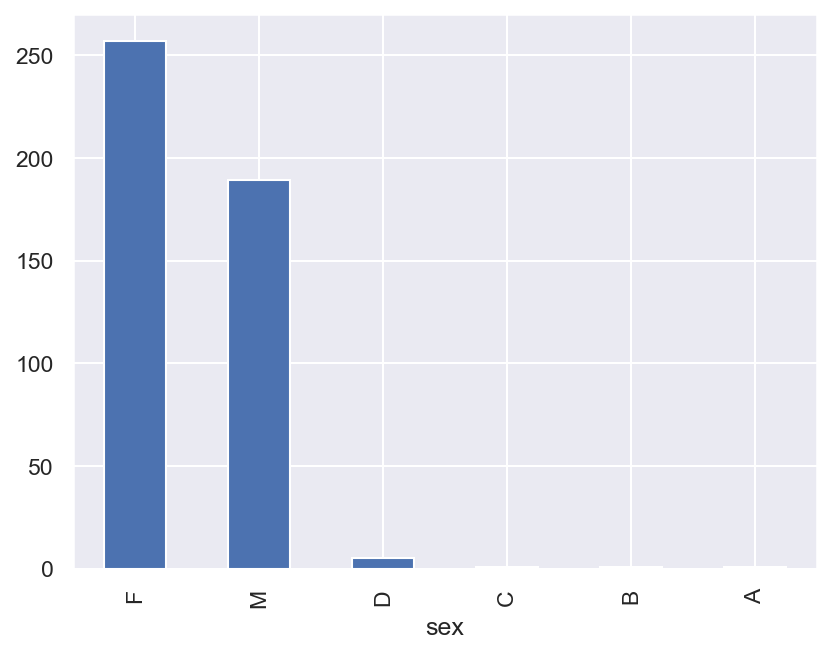

In [190]:
X_train['sex'].value_counts().plot(kind='bar')

Теперь рассмотрим влияние гендера на целевую переменную

<Axes: xlabel='sex', ylabel='G3'>

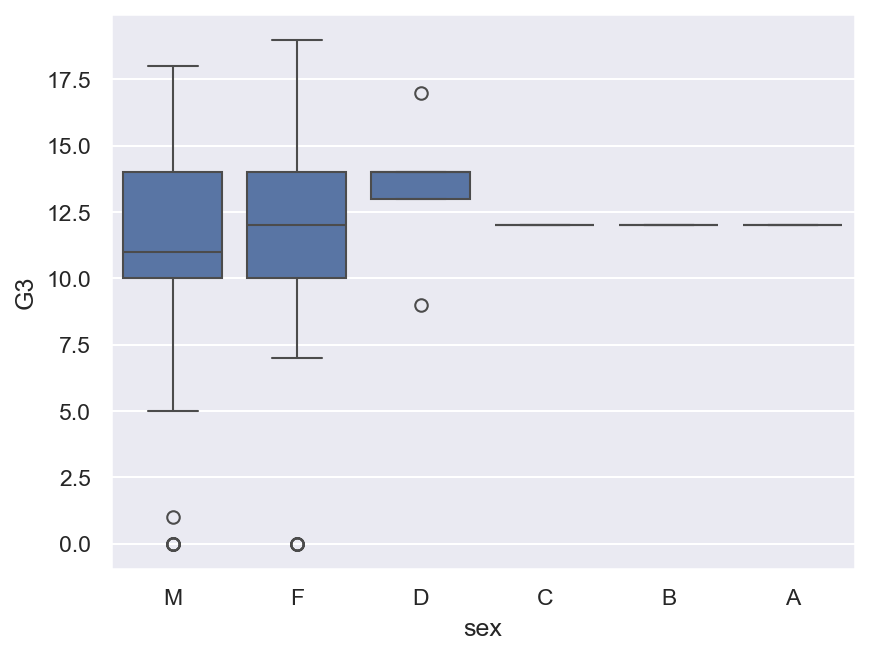

In [191]:
sns.boxplot(X_train, x='sex', y='G3')

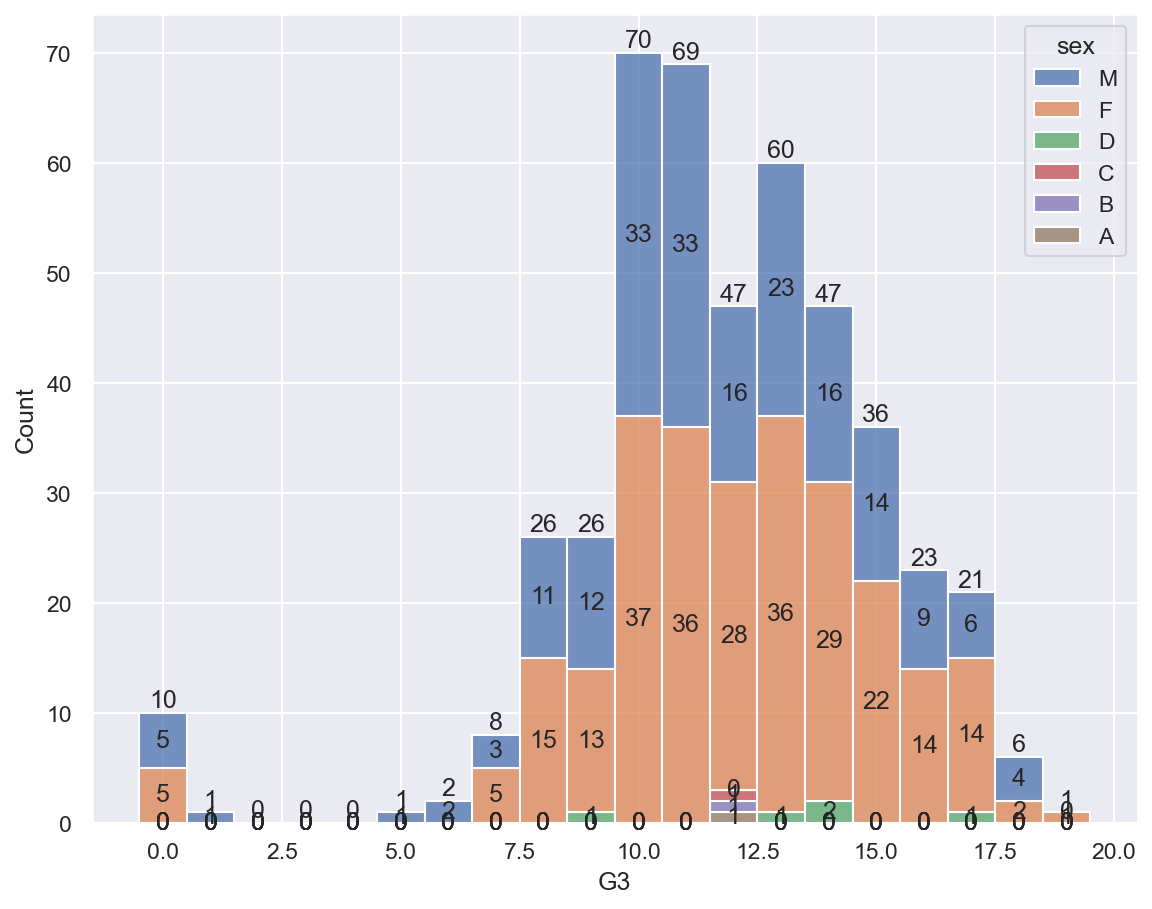

In [192]:
def visualize_histplot_for_sex():
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.histplot(data=X_train, x='G3', hue='sex', multiple='stack', bins=8, discrete=True, ax=ax)

    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    
    _ = ax.bar_label(ax.containers[-1])

    plt.show()


visualize_histplot_for_sex()

## Характеристика: "Age"

Ecли мы посмотрим на распределение возраста, то увидим, что студенты старшей школы имеют какой-то слишком странный возраст (все-таки 185 лет это уже слишком). Сначала посмотрим, что там с этим возрастом

In [193]:
X_train['age'].value_counts()

age
 17.0     111
 16.0     111
 18.0      95
 15.0      73
 19.0      19
 20.0       6
 21.0       2
 161.0      1
 181.0      1
 151.0      1
 116.0      1
 22.0       1
-1.0        1
 1.0        1
 5.0        1
 8.0        1
Name: count, dtype: int64

Увидим, что возраст меньше 15 и болеe 22 это кем-то занесенные ошибки (даже догадываюсь кем), ~~поэтому удалим их всех~~

In [194]:
# age_error_index = X_train[(X_train['age'] < 15) | (X_train['age'] > 22)].index
# X_train.drop(index=age_error_index, inplace=True)

~~Теперь все будет красивее и удобнее 🥳~~

<Axes: >

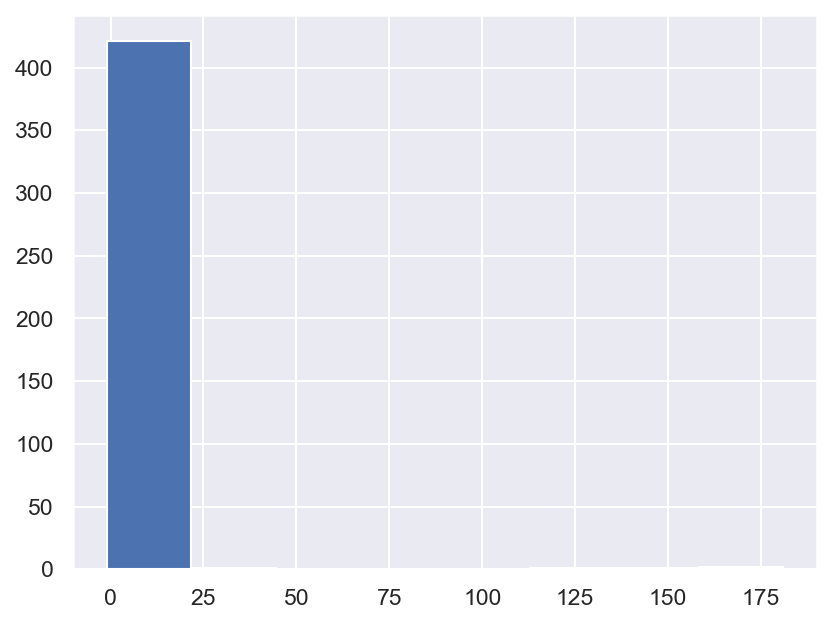

In [195]:
X_train['age'].hist(bins=8)

<Axes: xlabel='age'>

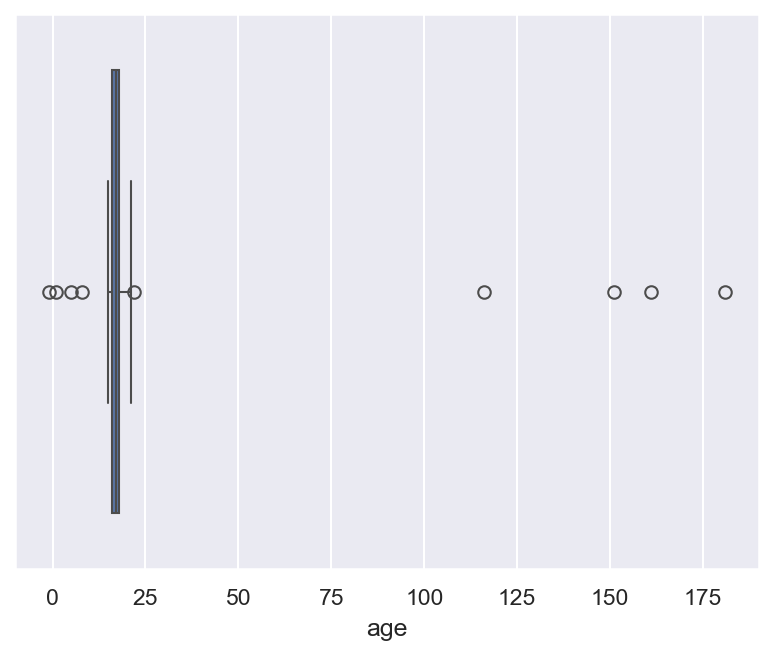

In [196]:
sns.boxplot(X_train, x='age')

<Axes: xlabel='age', ylabel='G3'>

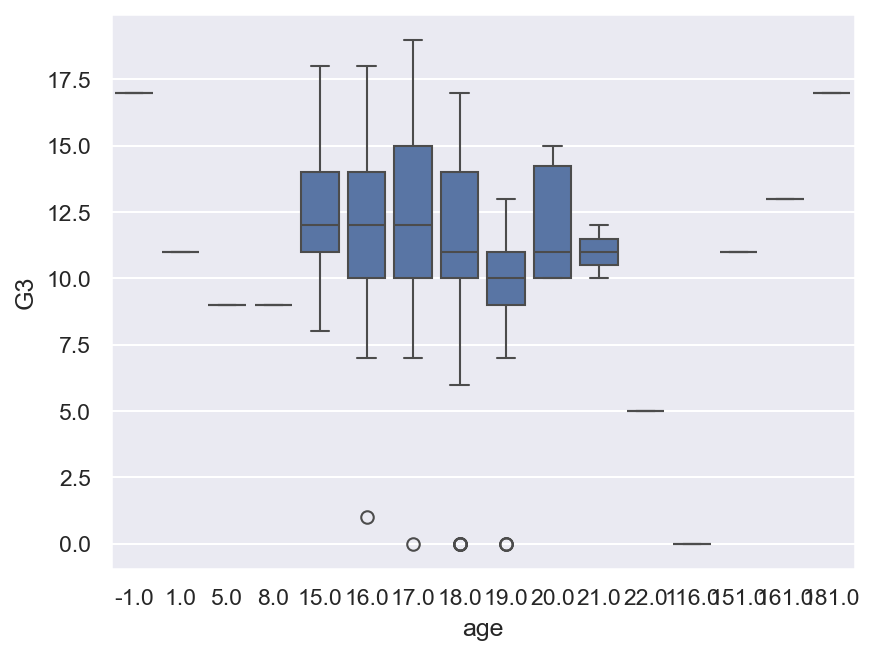

In [197]:
sns.boxplot(x='age', y='G3', data=X_train)

<Axes: xlabel='age', ylabel='G3'>

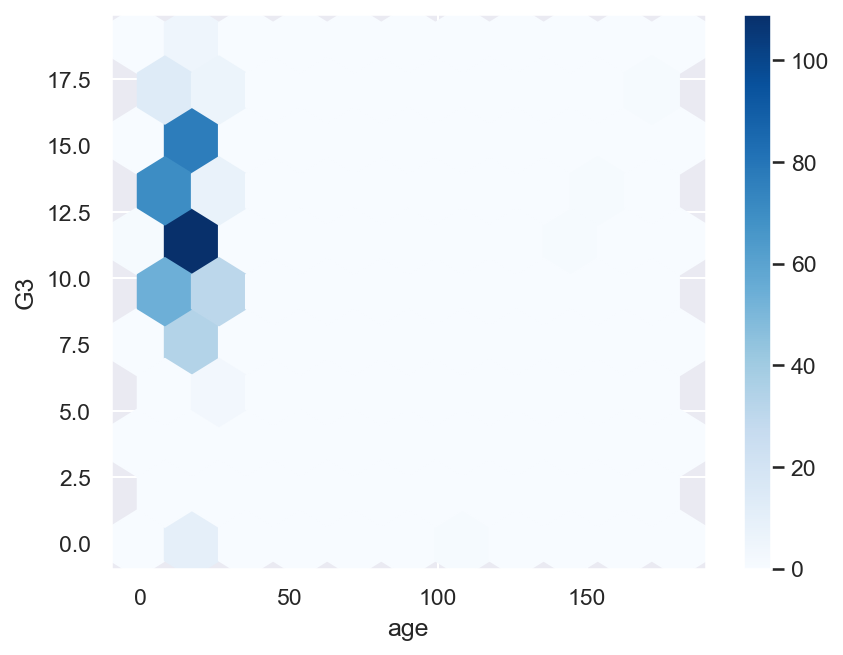

In [198]:
X_train.plot.hexbin(x='age', y='G3', gridsize=10, cmap='Blues')

## Характеристика: "Weekly study time"

In [199]:
X_train['studytime'].value_counts()

studytime
2    213
1    156
3     64
4     21
Name: count, dtype: int64

### Видим, что в этот раз никаких странных признаков в датасете у нас нет и поэтому очень радуемся 🥰

### Посмотрим на процентное соотношение признаков

<Axes: ylabel='count'>

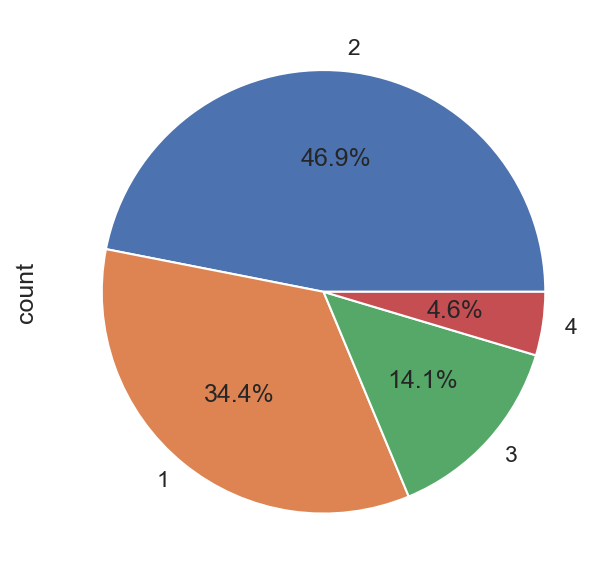

In [200]:
X_train['studytime'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Посмотрим на количество различных значений

<Axes: xlabel='studytime'>

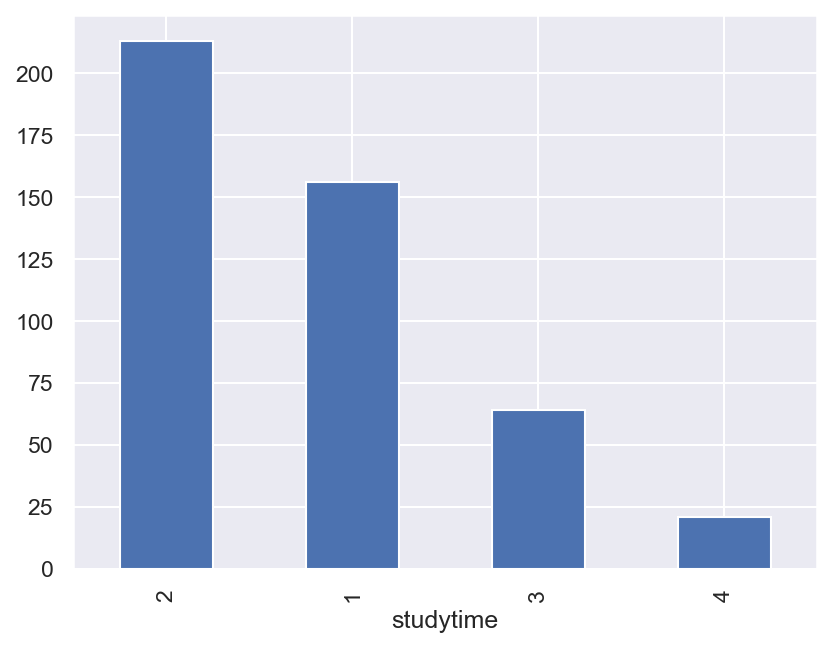

In [201]:
X_train['studytime'].value_counts().plot(kind='bar')

### Рассмотрим также влияние времени обучения на целевую переменную

<Axes: xlabel='studytime', ylabel='G3'>

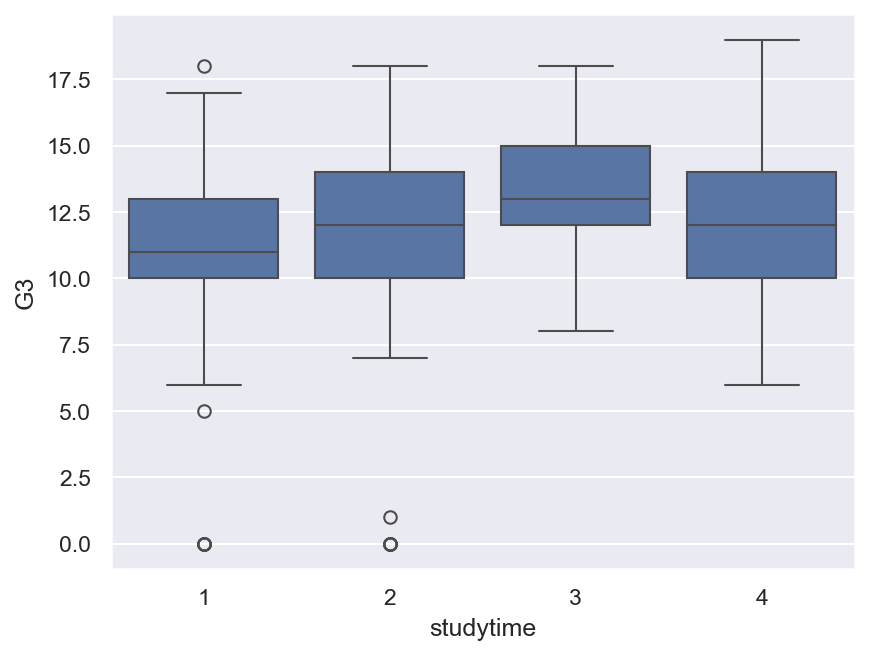

In [202]:
sns.boxplot(X_train, x='studytime', y='G3')

### Видно, что в среднем лучше всего оценки у тех, кто учится больше, чем большинство, но не слишком много (от 5 до 10 часов)

### Tеперь мы построим график и посмотрим, на распределение оценок и то, сколько люди учатся, чтобы получить эту оценку

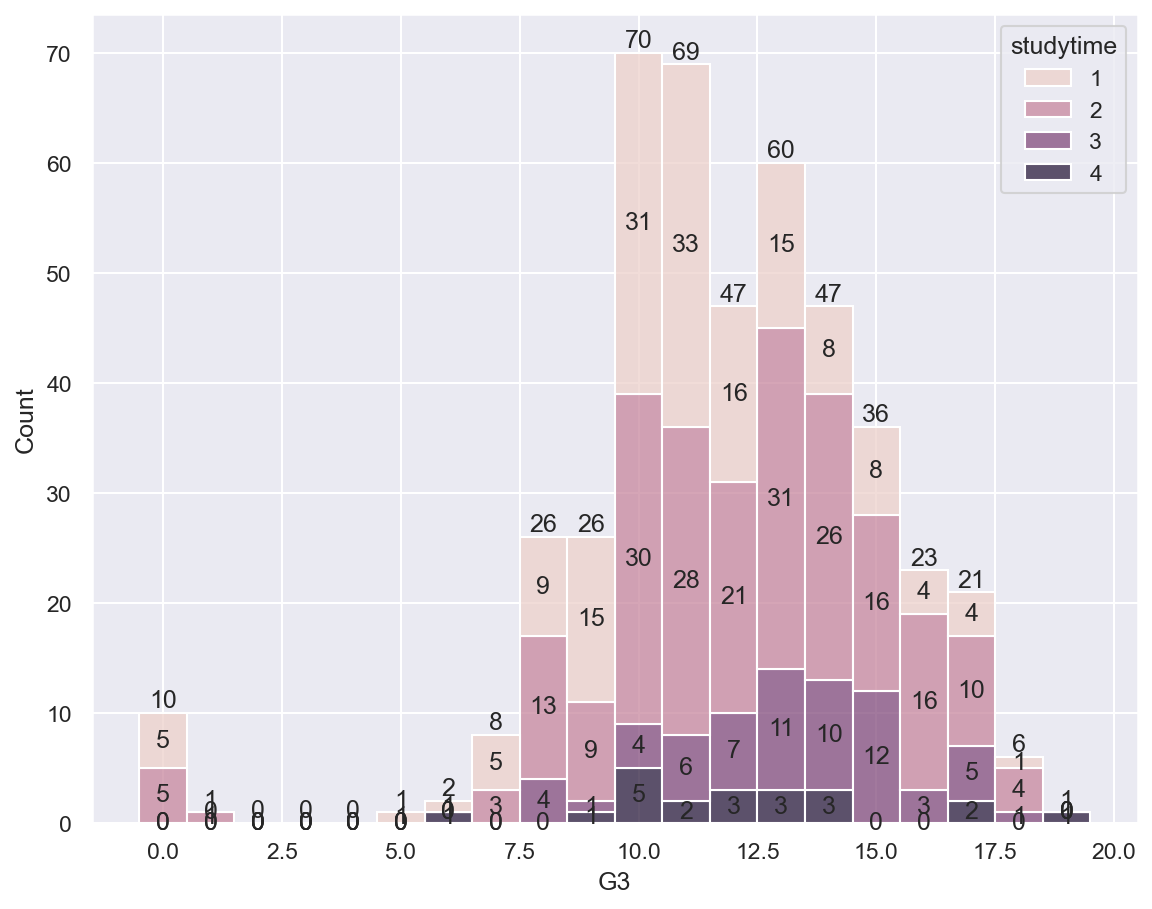

In [203]:
def visualize_histplot_for_studytime():
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.histplot(data=X_train, x='G3', hue='studytime', multiple='stack', bins=8, discrete=True, ax=ax)

    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    
    _ = ax.bar_label(ax.containers[-1])

    plt.show()


visualize_histplot_for_studytime()

### Видно, что в целом, люди которые очень много учатся не получают низких оценок, а самую большую оценку получил тот, кто много учился (как удивительно 🤭)

## Характеристика: "Romantic Relationship"

In [204]:
X_train['romantic'].unique()

array(['yes', 'no'], dtype=object)

### Становится грустно от того, что больше вбросов в датасете нет 😢

<Axes: ylabel='count'>

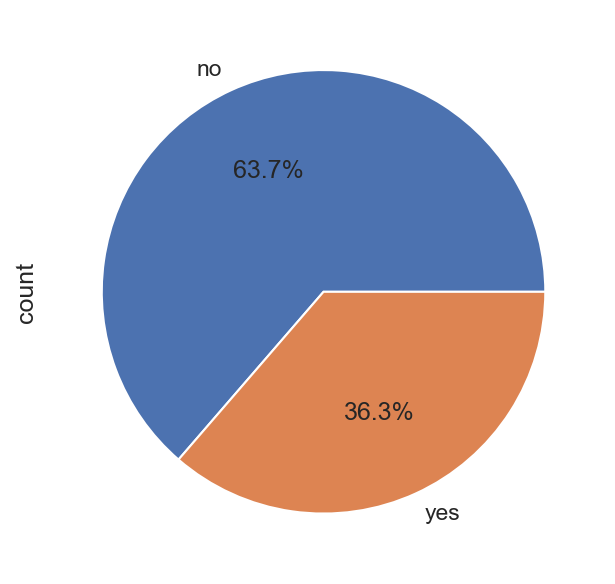

In [205]:
X_train['romantic'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='romantic'>

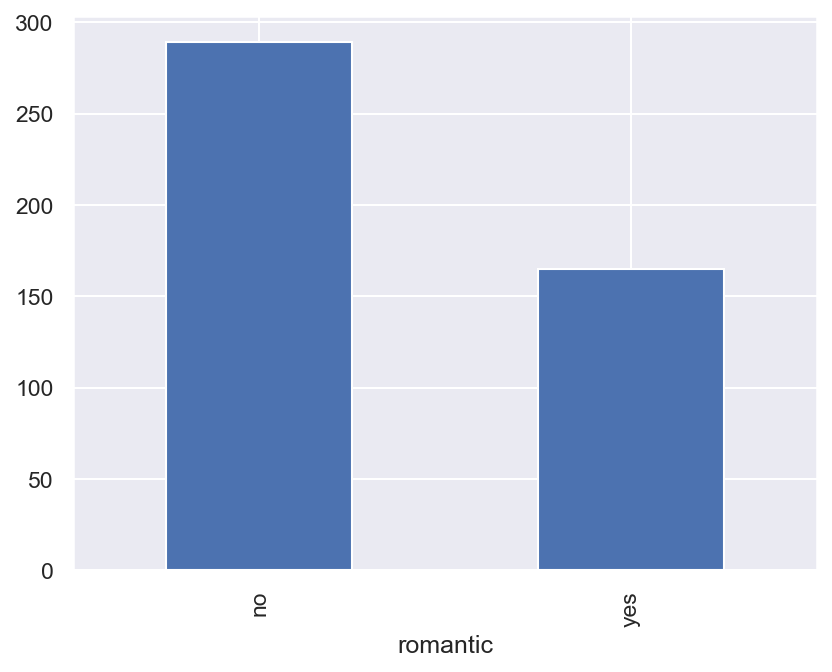

In [206]:
X_train['romantic'].value_counts().plot(kind='bar')

<Axes: xlabel='romantic', ylabel='G3'>

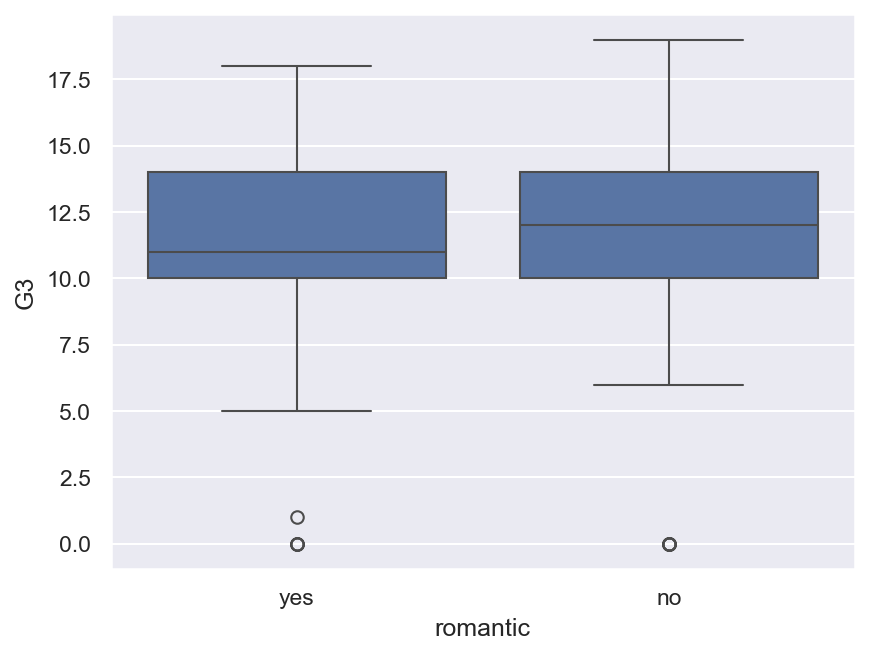

In [207]:
sns.boxplot(X_train, x='romantic', y='G3')

### Можно заметить, что у тех, у кого нет отношений в среднем получают оценки лучше, ещё и усы у них выше, из чего можно сделать вывод, что ❤️😘❌👺

Теперь выведу свой любимый график

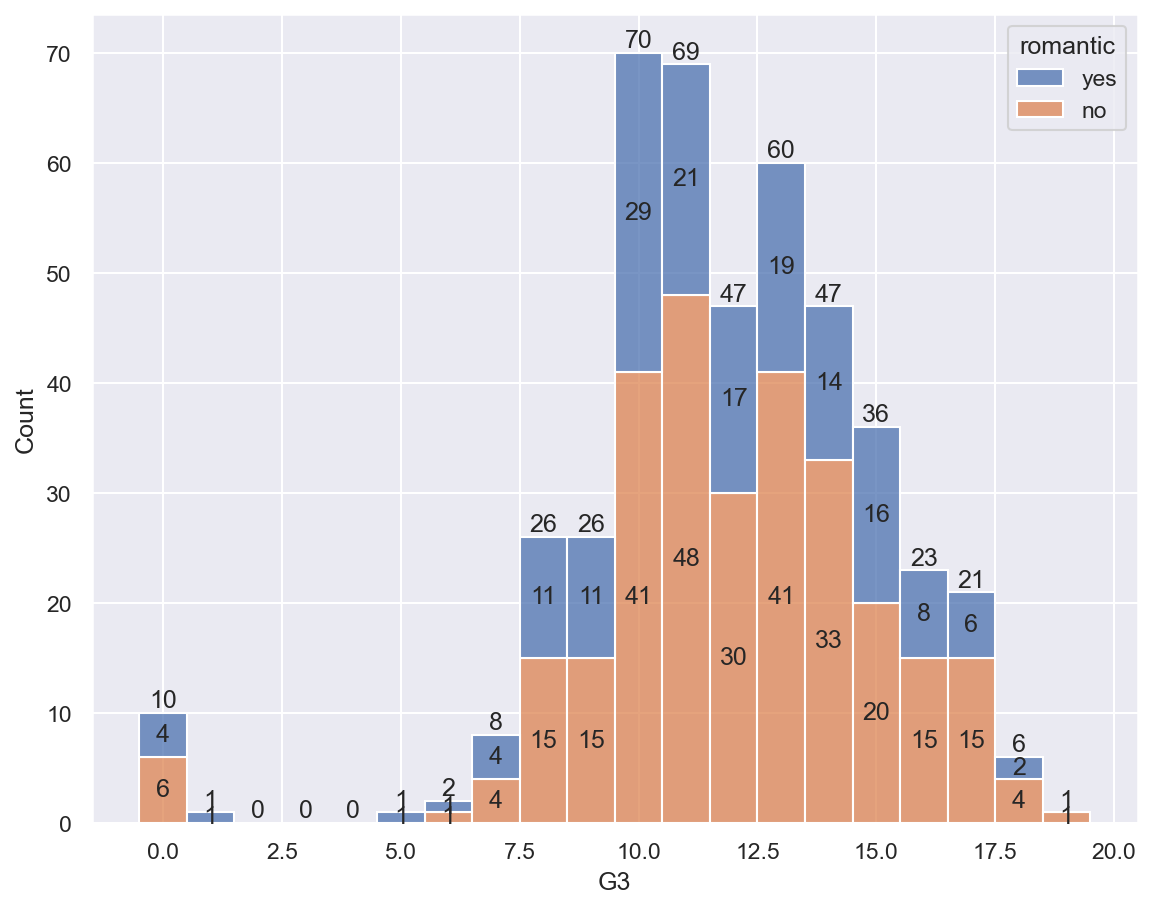

In [208]:
def visualize_histplot_for_romantic():
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.histplot(data=X_train, x='G3', hue='romantic', multiple='stack', bins=8, discrete=True, ax=ax)

    for c in ax.containers:
        ax.bar_label(c, label_type='center', fmt=lambda x: "" if x == 0 else int(x))
    
    _ = ax.bar_label(ax.containers[-1])

    plt.show()


visualize_histplot_for_romantic()

## Характеристика: "Alcohol Consumption"

Так как не сказано, какую именно характеристику исследовать, исследуем обе

### Workday alcohol consumption

In [209]:
X_train['Dalc'].unique()

array([2, 3, 1, 5, 4])

<Axes: ylabel='count'>

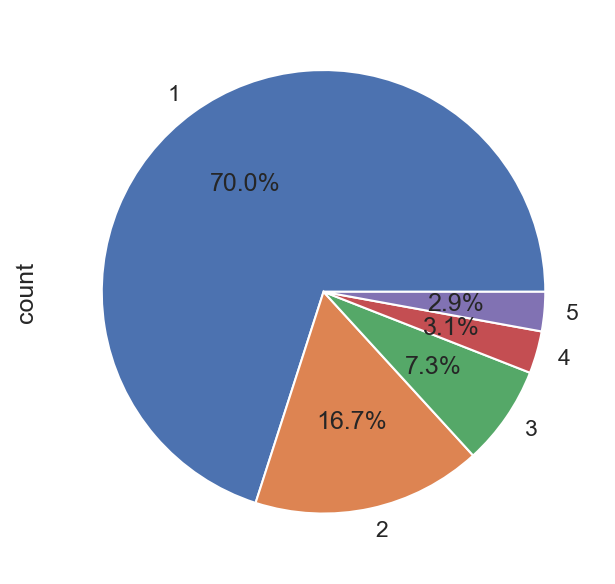

In [210]:
X_train['Dalc'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='Dalc'>

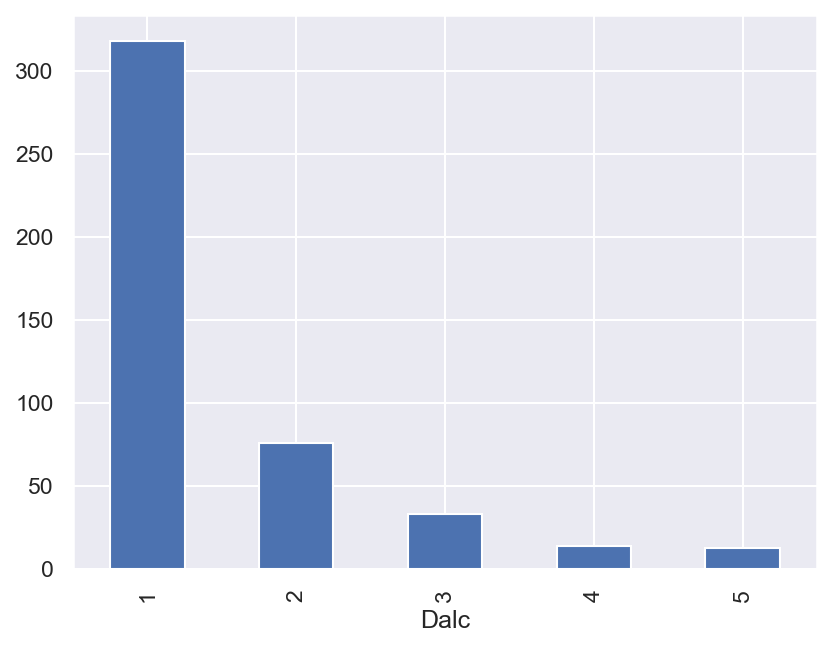

In [211]:
X_train['Dalc'].value_counts().plot(kind='bar')

<Axes: xlabel='Dalc', ylabel='G3'>

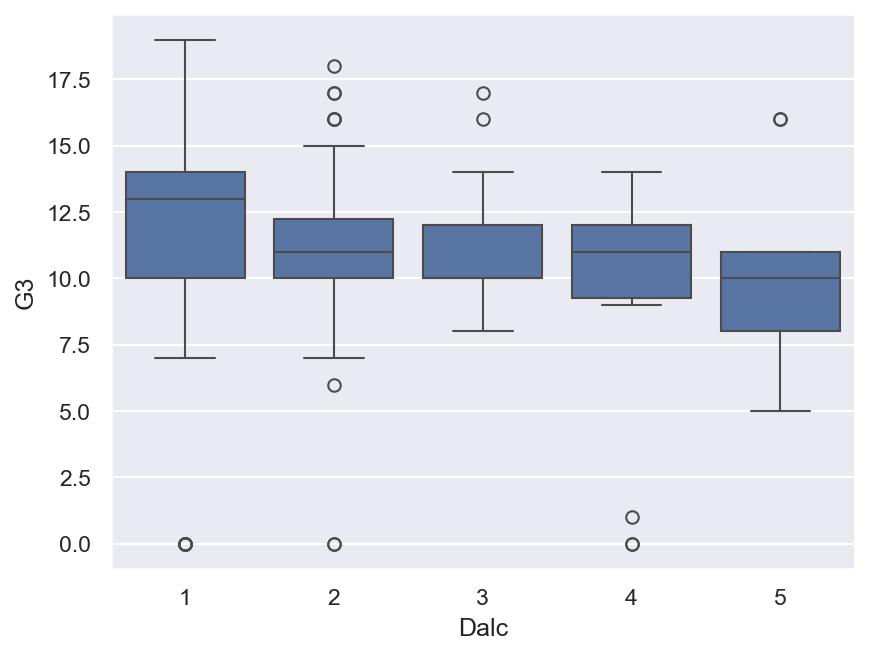

In [212]:
sns.boxplot(X_train, x='Dalc', y='G3')

Видно, что чем больше алкоголя ты пьешь, тем хуже твои результаты. Но есть какие-то уникумы, которые не смотря на больше потребление алкоголя имеют хорошие оценки. А ещё интересно, что в группе, которая пьет очень алкоголя в будние дни, оценка ниже 5 не опускается 🤔

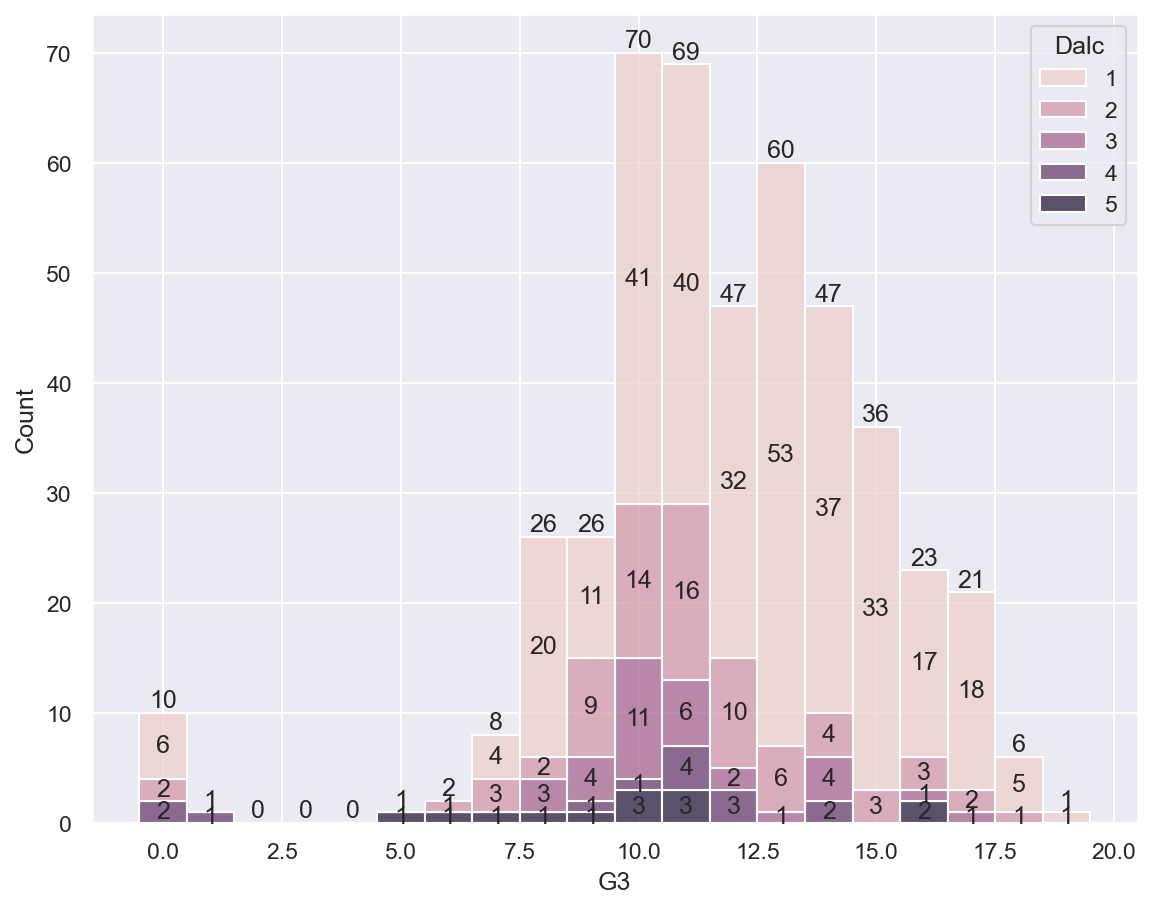

In [213]:
def visualize_histplot_for_Dalc():
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.histplot(data=X_train, x='G3', hue='Dalc', multiple='stack', bins=8, discrete=True, ax=ax)

    for c in ax.containers:
        ax.bar_label(c, label_type='center', fmt=lambda x: "" if x == 0 else int(x))
    
    _ = ax.bar_label(ax.containers[-1])

    plt.show()


visualize_histplot_for_Dalc()

### Weekend alcohol consumption

In [214]:
X_train['Walc'].unique()

array([3, 5, 1, 2, 4])

<Axes: ylabel='count'>

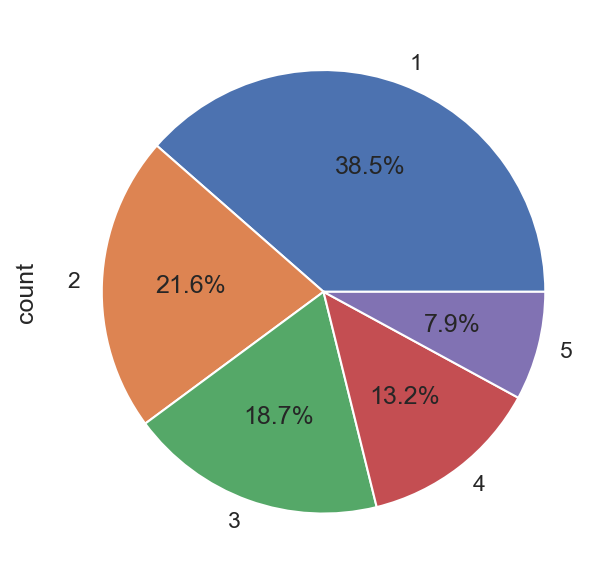

In [215]:
X_train['Walc'].value_counts().plot(kind='pie', autopct='%1.1f%%')

Удивительно, как уменьшилась доля людей, которые пьют мало алкоголя

<Axes: xlabel='Walc'>

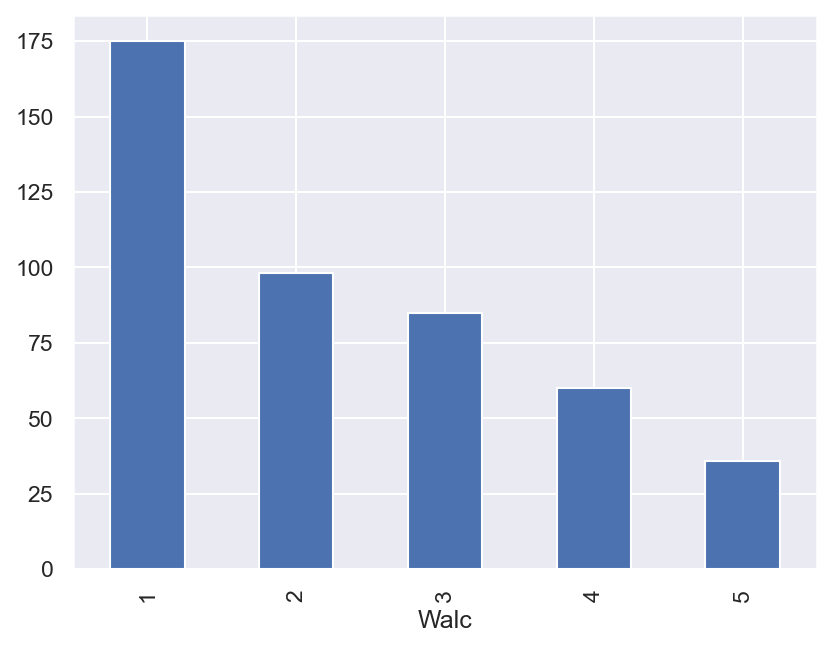

In [216]:
X_train['Walc'].value_counts().plot(kind='bar')

<Axes: xlabel='Walc', ylabel='G3'>

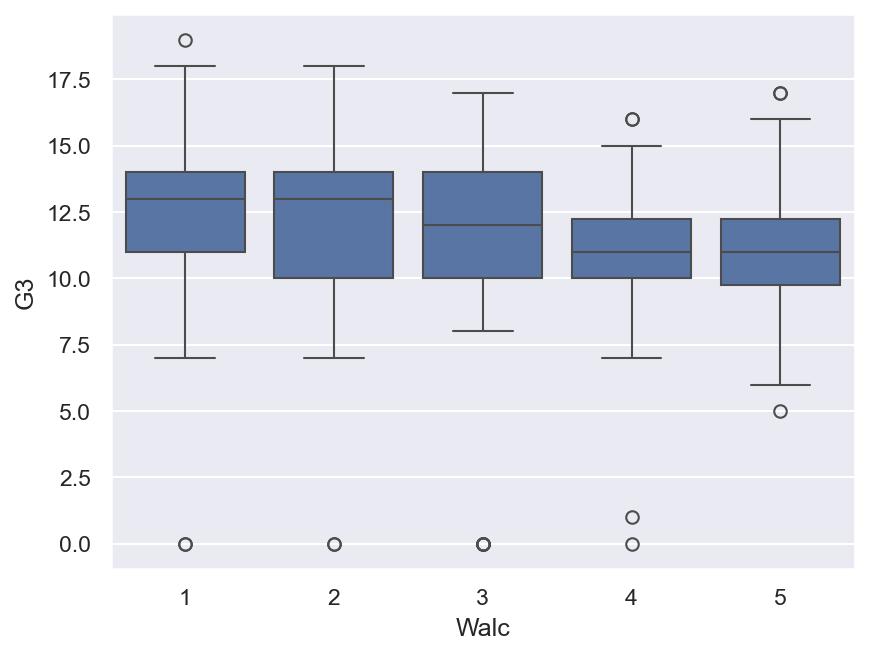

In [217]:
sns.boxplot(X_train, x='Walc', y='G3')

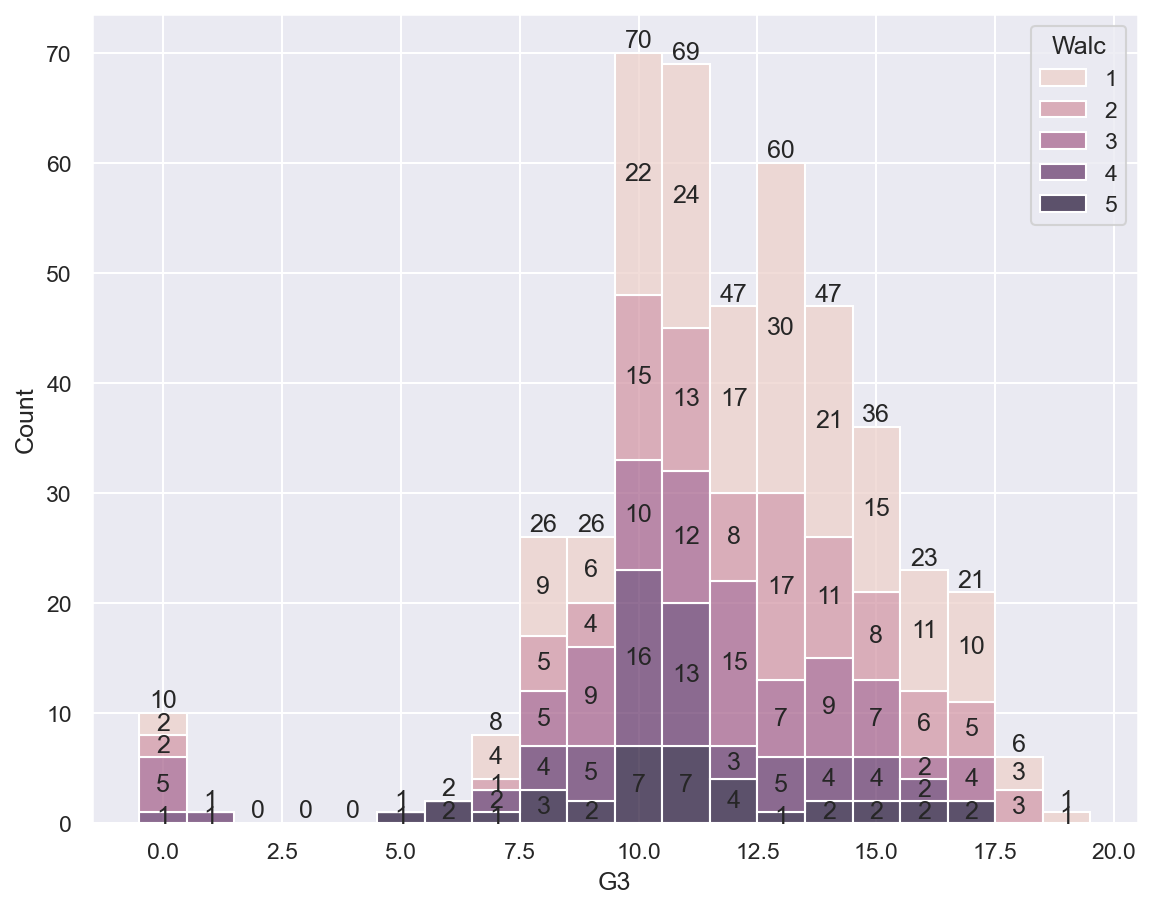

In [218]:
def visualize_histplot_for_Walc():
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.histplot(data=X_train, x='G3', hue='Walc', multiple='stack', bins=8, discrete=True, ax=ax)

    for c in ax.containers:
        ax.bar_label(c, label_type='center', fmt=lambda x: "" if x == 0 else int(x))
    
    _ = ax.bar_label(ax.containers[-1])

    plt.show()


visualize_histplot_for_Walc()

## Целевая зависимость: "G3" (Final Grade)

In [219]:
X_train['G3'].unique()

array([ 9, 12, 13, 11, 14, 16, 10, 17,  8, 15,  0,  6,  7, 19, 18,  1,  5])

<Axes: xlabel='G3'>

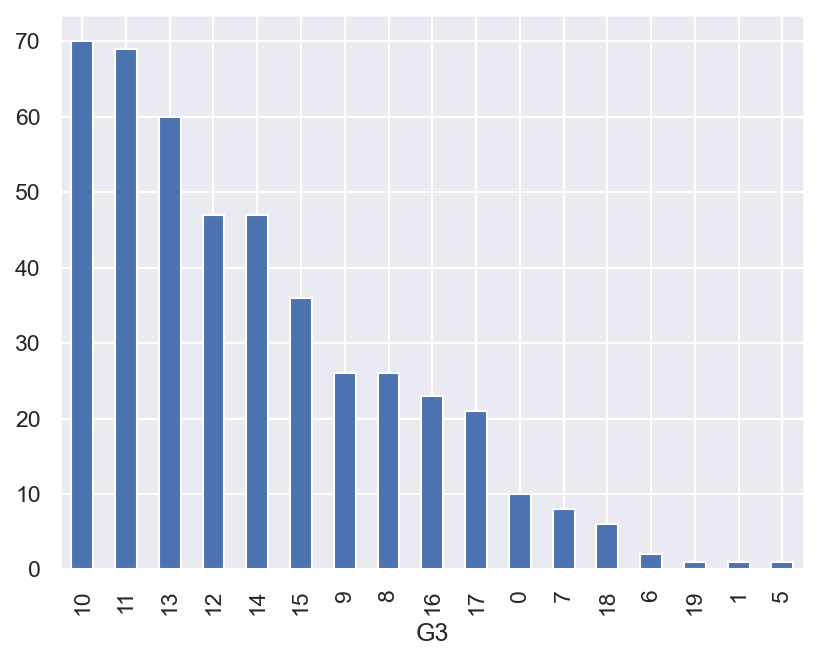

In [220]:
X_train['G3'].value_counts().plot(kind='bar')

<Axes: xlabel='G3'>

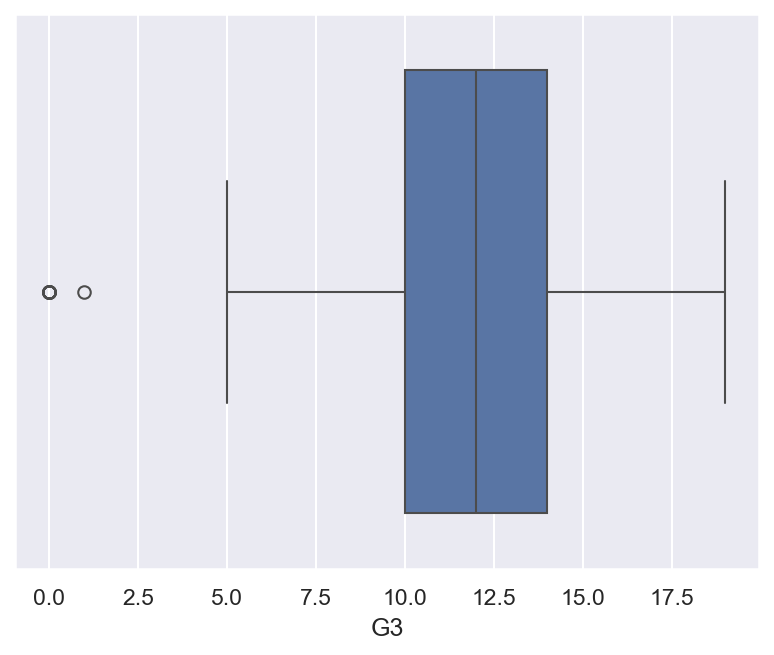

In [221]:
sns.boxplot(X_train, x='G3')

## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

### Traveltime
Исследуем время, сколько школьники добираются до школы и обратно (насколько я понял)

#### Уникальные значения

In [222]:
X_train['traveltime'].unique()

array([1, 3, 2, 4])

#### Процентное соотношение

<Axes: ylabel='count'>

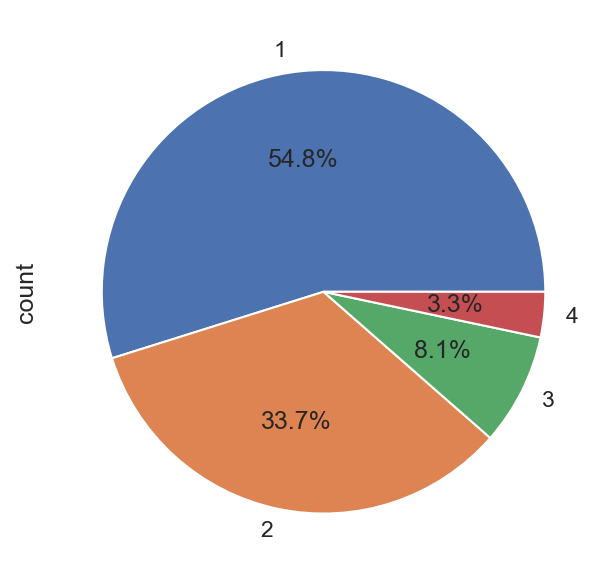

In [223]:
X_train['traveltime'].value_counts().plot(kind='pie', autopct='%1.1f%%')

#### Количество значений

<Axes: xlabel='traveltime'>

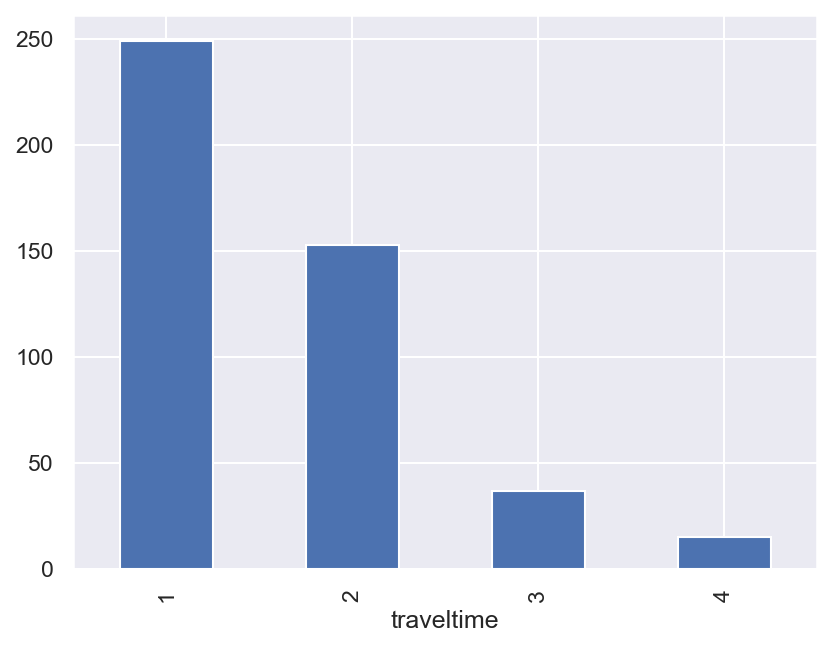

In [224]:
X_train['traveltime'].value_counts().plot(kind='bar')

#### Влияние на целевую переменную

<Axes: xlabel='traveltime', ylabel='G3'>

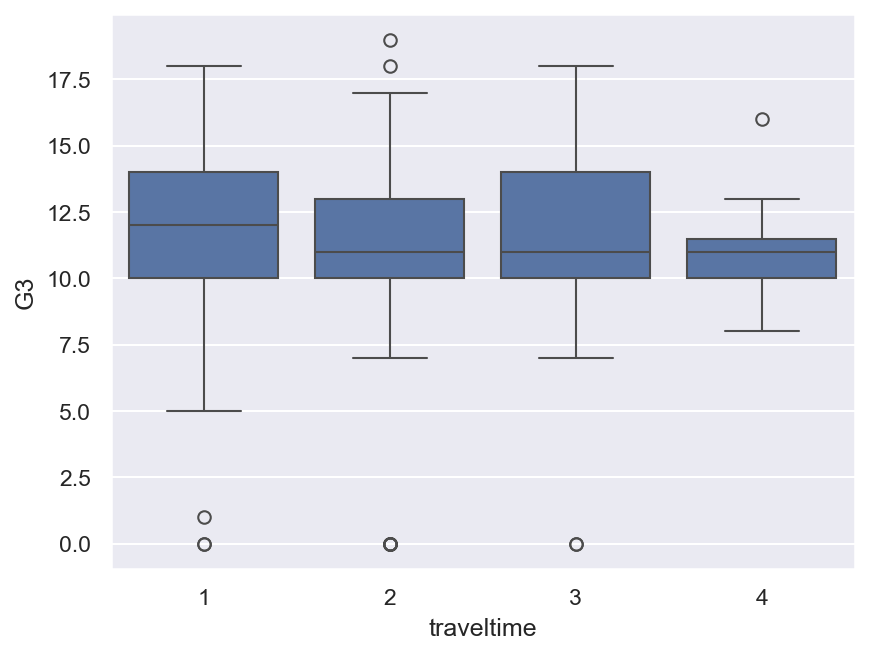

In [225]:
sns.boxplot(X_train, x='traveltime', y='G3')

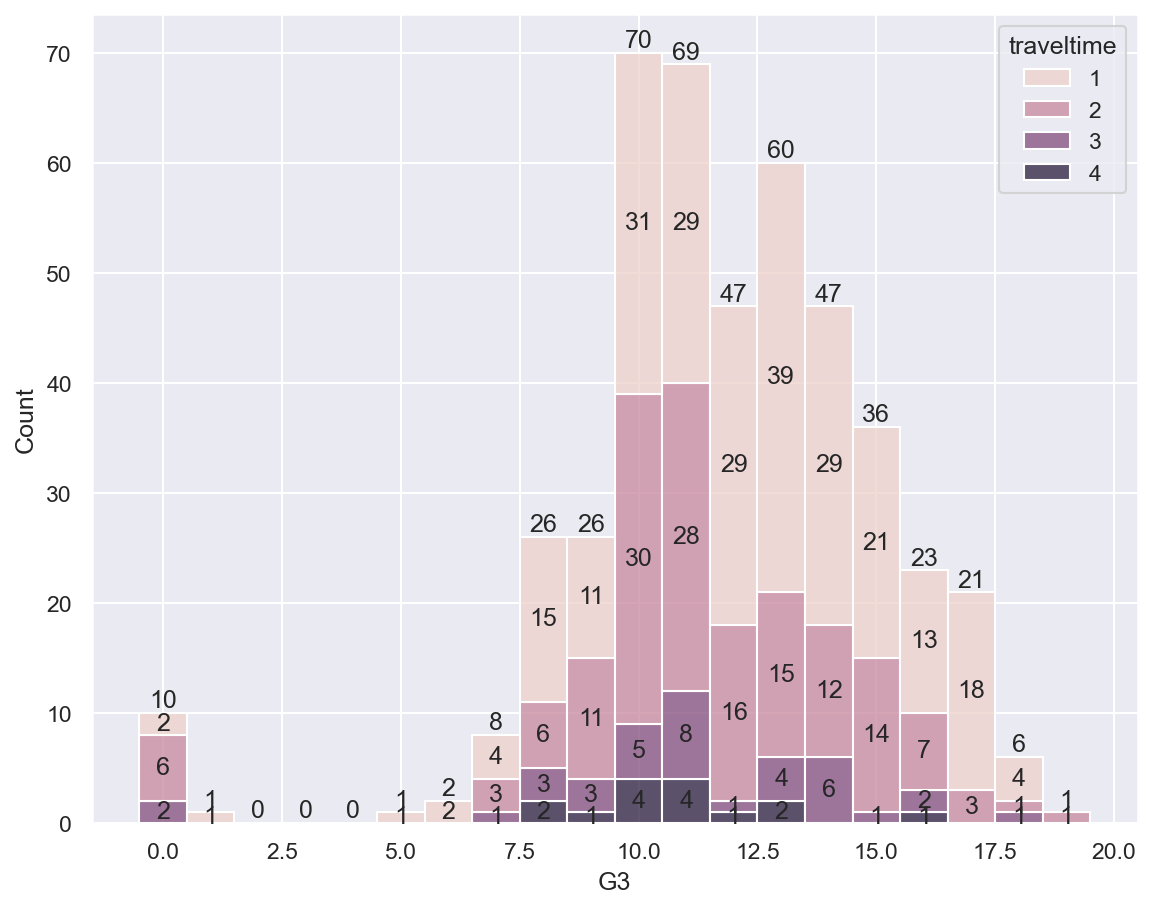

In [226]:
def visualize_histplot_for_traveltime():
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.histplot(data=X_train, x='G3', hue='traveltime', multiple='stack', bins=8, discrete=True, ax=ax)

    for c in ax.containers:
        ax.bar_label(c, label_type='center', fmt=lambda x: "" if x == 0 else int(x))
    
    _ = ax.bar_label(ax.containers[-1])

    plt.show()


visualize_histplot_for_traveltime()

### Family relationship

#### Уникальные значения

In [227]:
X_train['famrel'].unique()

array([4, 3, 5, 1, 2])

#### Процентное соотношение

<Axes: ylabel='count'>

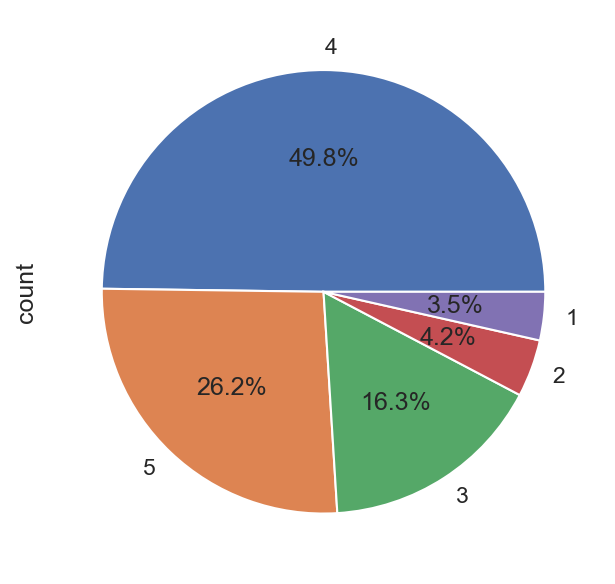

In [228]:
X_train['famrel'].value_counts().plot(kind='pie', autopct='%1.1f%%')

#### Количество значений

<Axes: xlabel='famrel'>

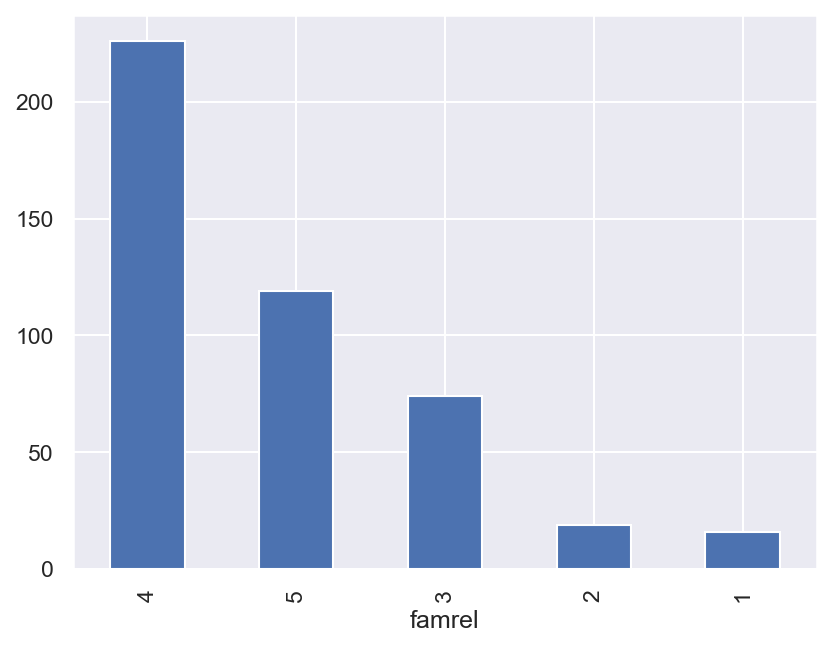

In [229]:
X_train['famrel'].value_counts().plot(kind='bar')

#### Влияние на целевую переменную

<Axes: xlabel='famrel', ylabel='G3'>

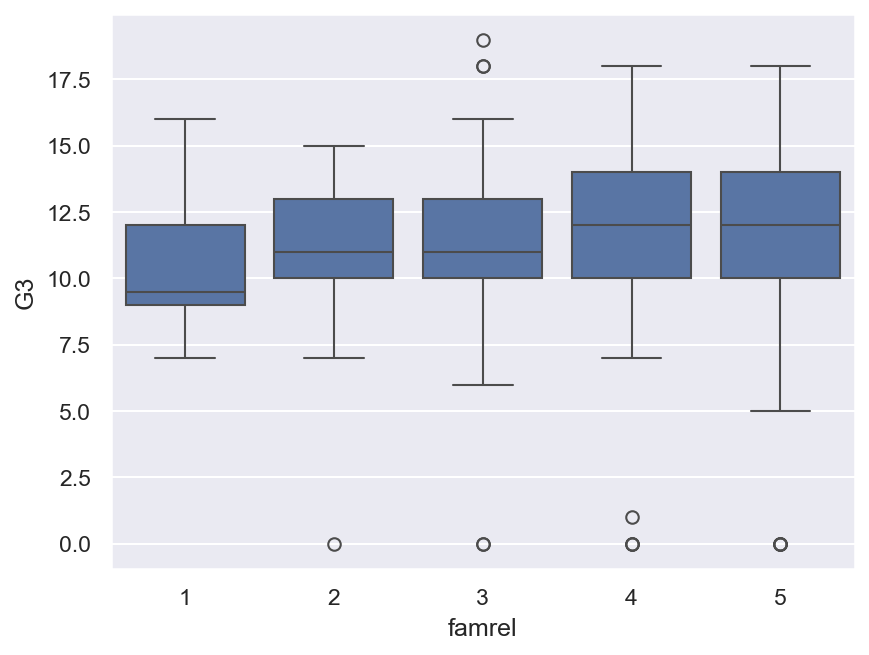

In [230]:
sns.boxplot(X_train, x='famrel', y='G3')

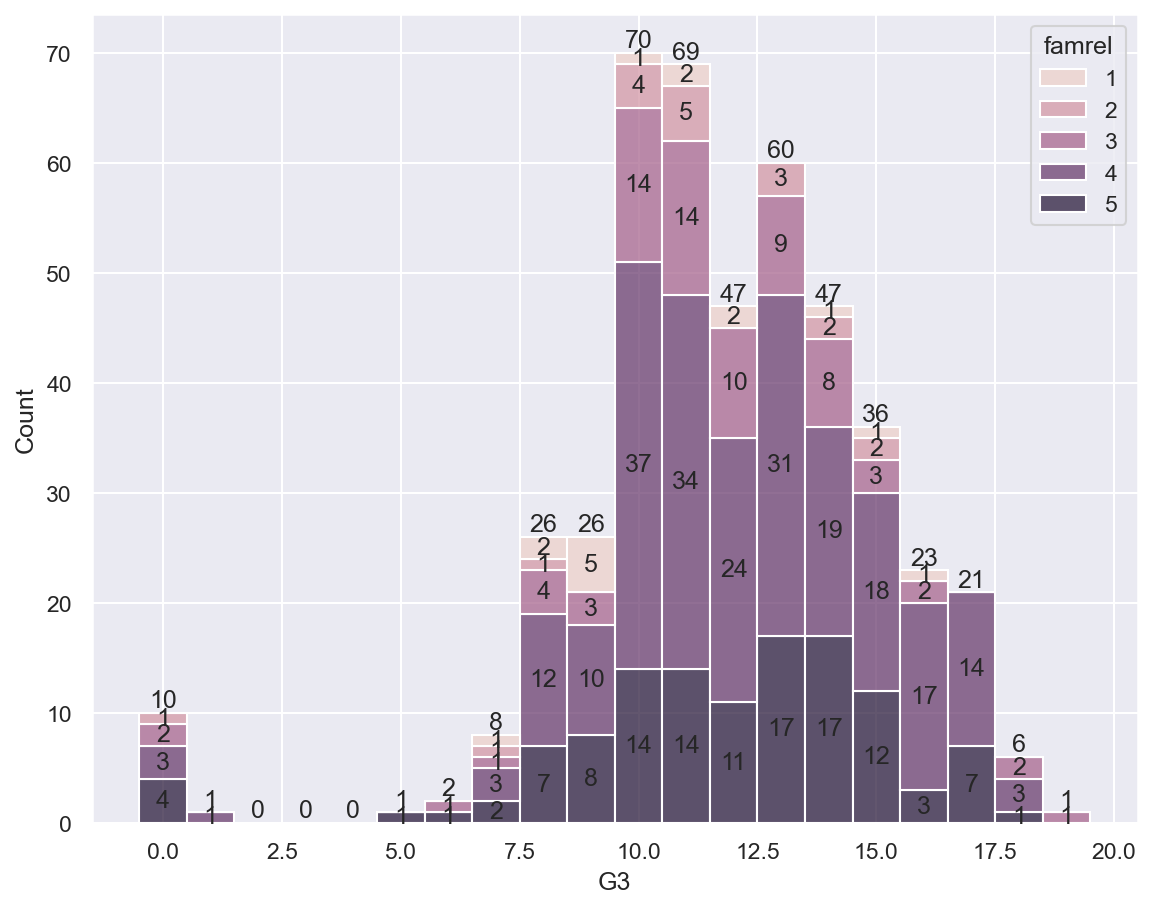

In [231]:
def visualize_histplot_for_famrel():
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.histplot(data=X_train, x='G3', hue='famrel', multiple='stack', bins=8, discrete=True, ax=ax)

    for c in ax.containers:
        ax.bar_label(c, label_type='center', fmt=lambda x: "" if x == 0 else int(x))
    
    _ = ax.bar_label(ax.containers[-1])

    plt.show()


visualize_histplot_for_famrel()

### Number of school absences

#### Количество пропусков 

<Axes: xlabel='absences', ylabel='Count'>

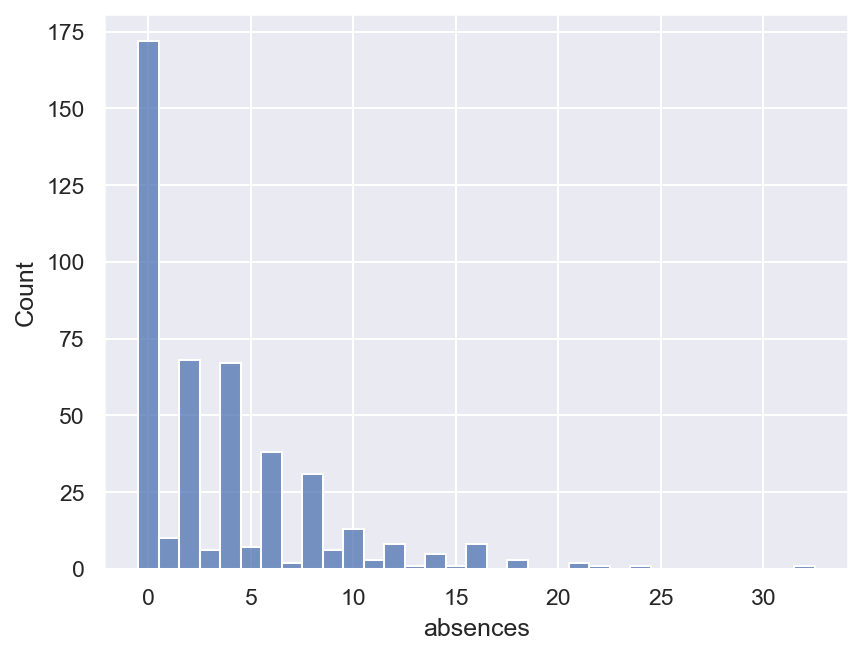

In [232]:
sns.histplot(data=X_train, x='absences', multiple='stack', bins=8, discrete=True)

#### График-скрипка

<Axes: xlabel='absences'>

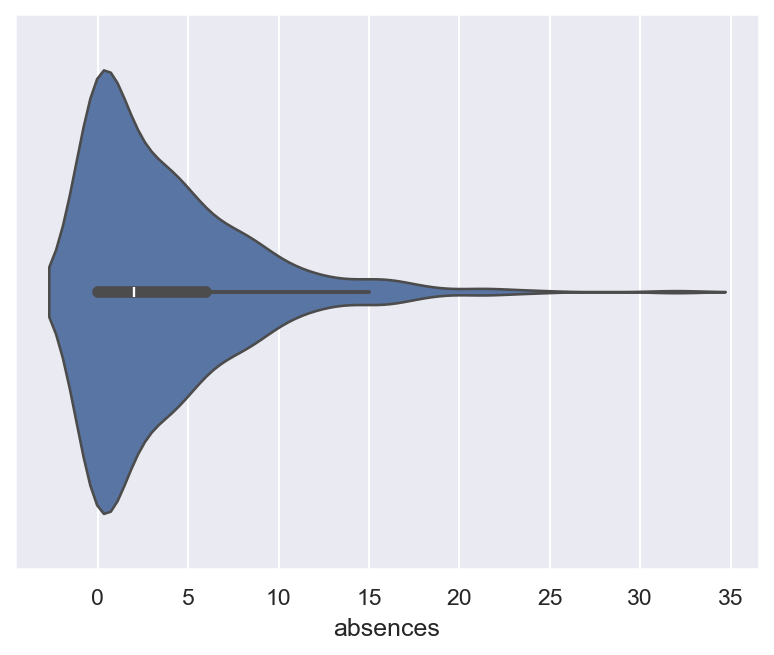

In [233]:
sns.violinplot(data=X_train, x='absences')

Можно увидеть по нему, что большинство учеников практически не пропускают

#### Влияние признака на целевую переменную

<Axes: xlabel='absences', ylabel='G3'>

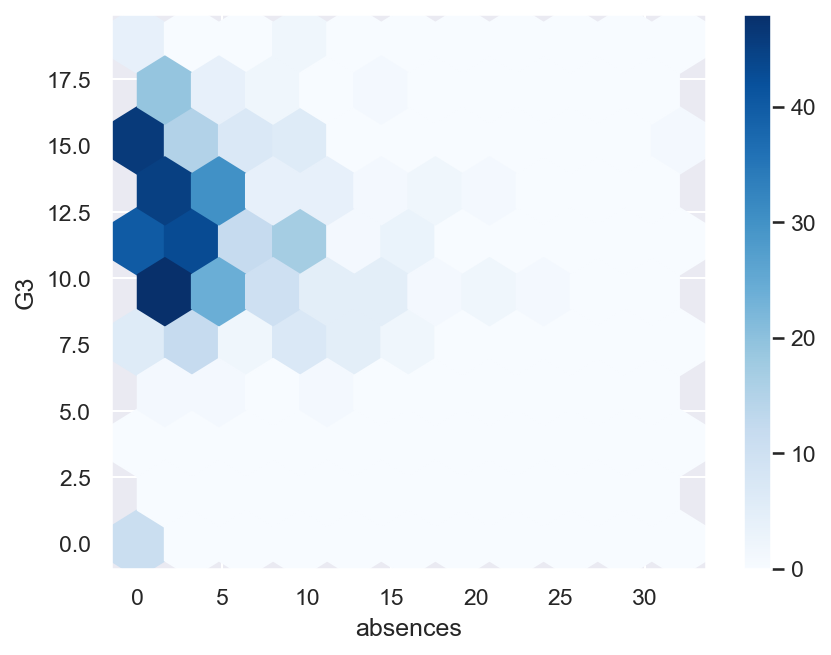

In [234]:
X_train.plot.hexbin(x='absences', y='G3', gridsize=10, cmap='Blues')

В целом, можно заметить, что бал выше чаще получают те, кто имеет меньше всего пропусков

### Going out with friends
Сделаю небольшую хитрость и скажу, что это численный признак (почему нет, значения ведь числа 🧐)

#### Процентное соотношение

<Axes: ylabel='count'>

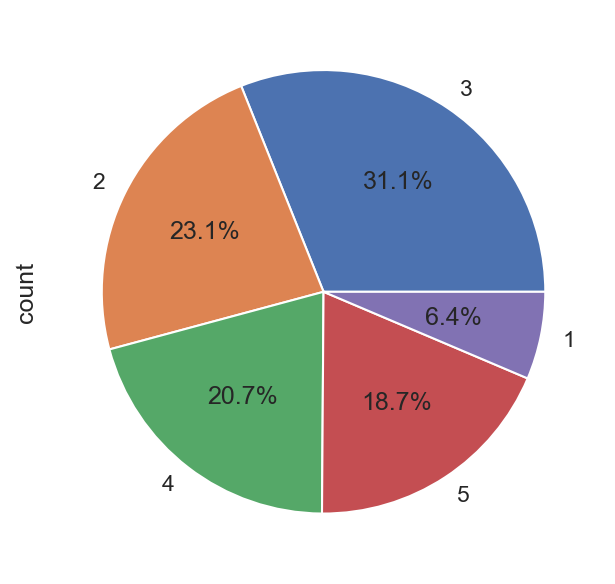

In [235]:
X_train['goout'].value_counts().plot(kind='pie', autopct='%1.1f%%')

#### Количество значений

<Axes: xlabel='goout'>

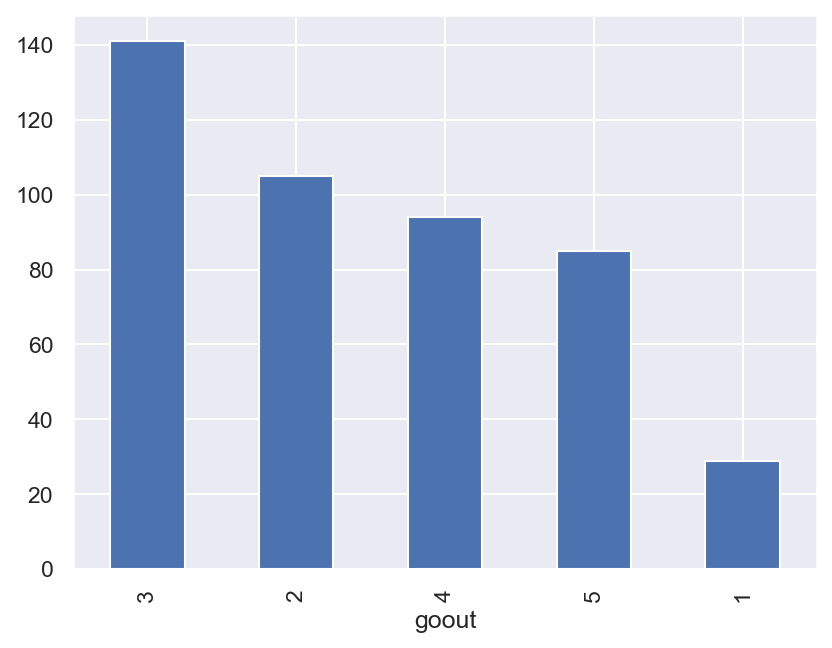

In [236]:
X_train['goout'].value_counts().plot(kind='bar')

#### Влияние на целевую переменную

<Axes: xlabel='goout', ylabel='G3'>

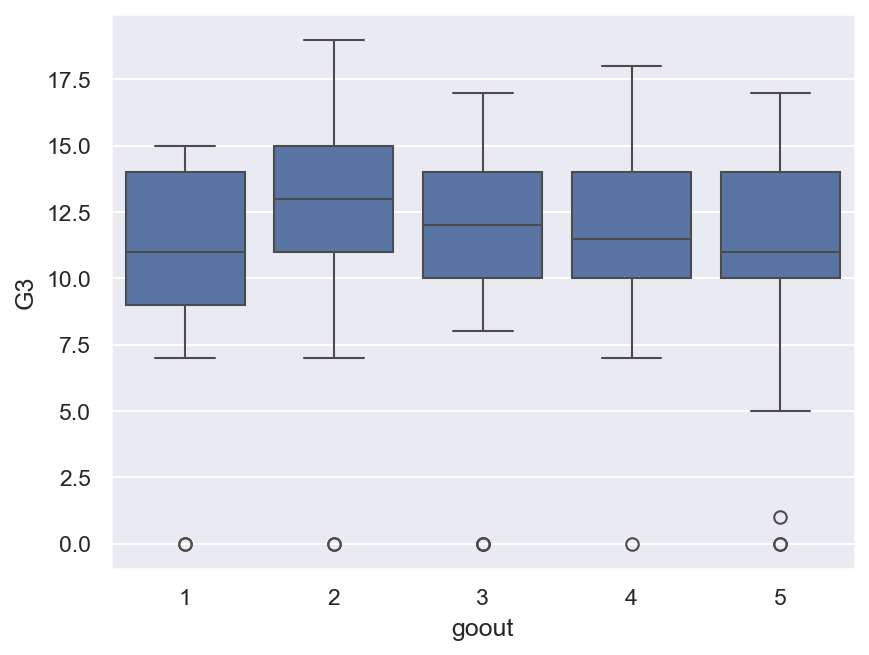

In [237]:
sns.boxplot(X_train, x='goout', y='G3')

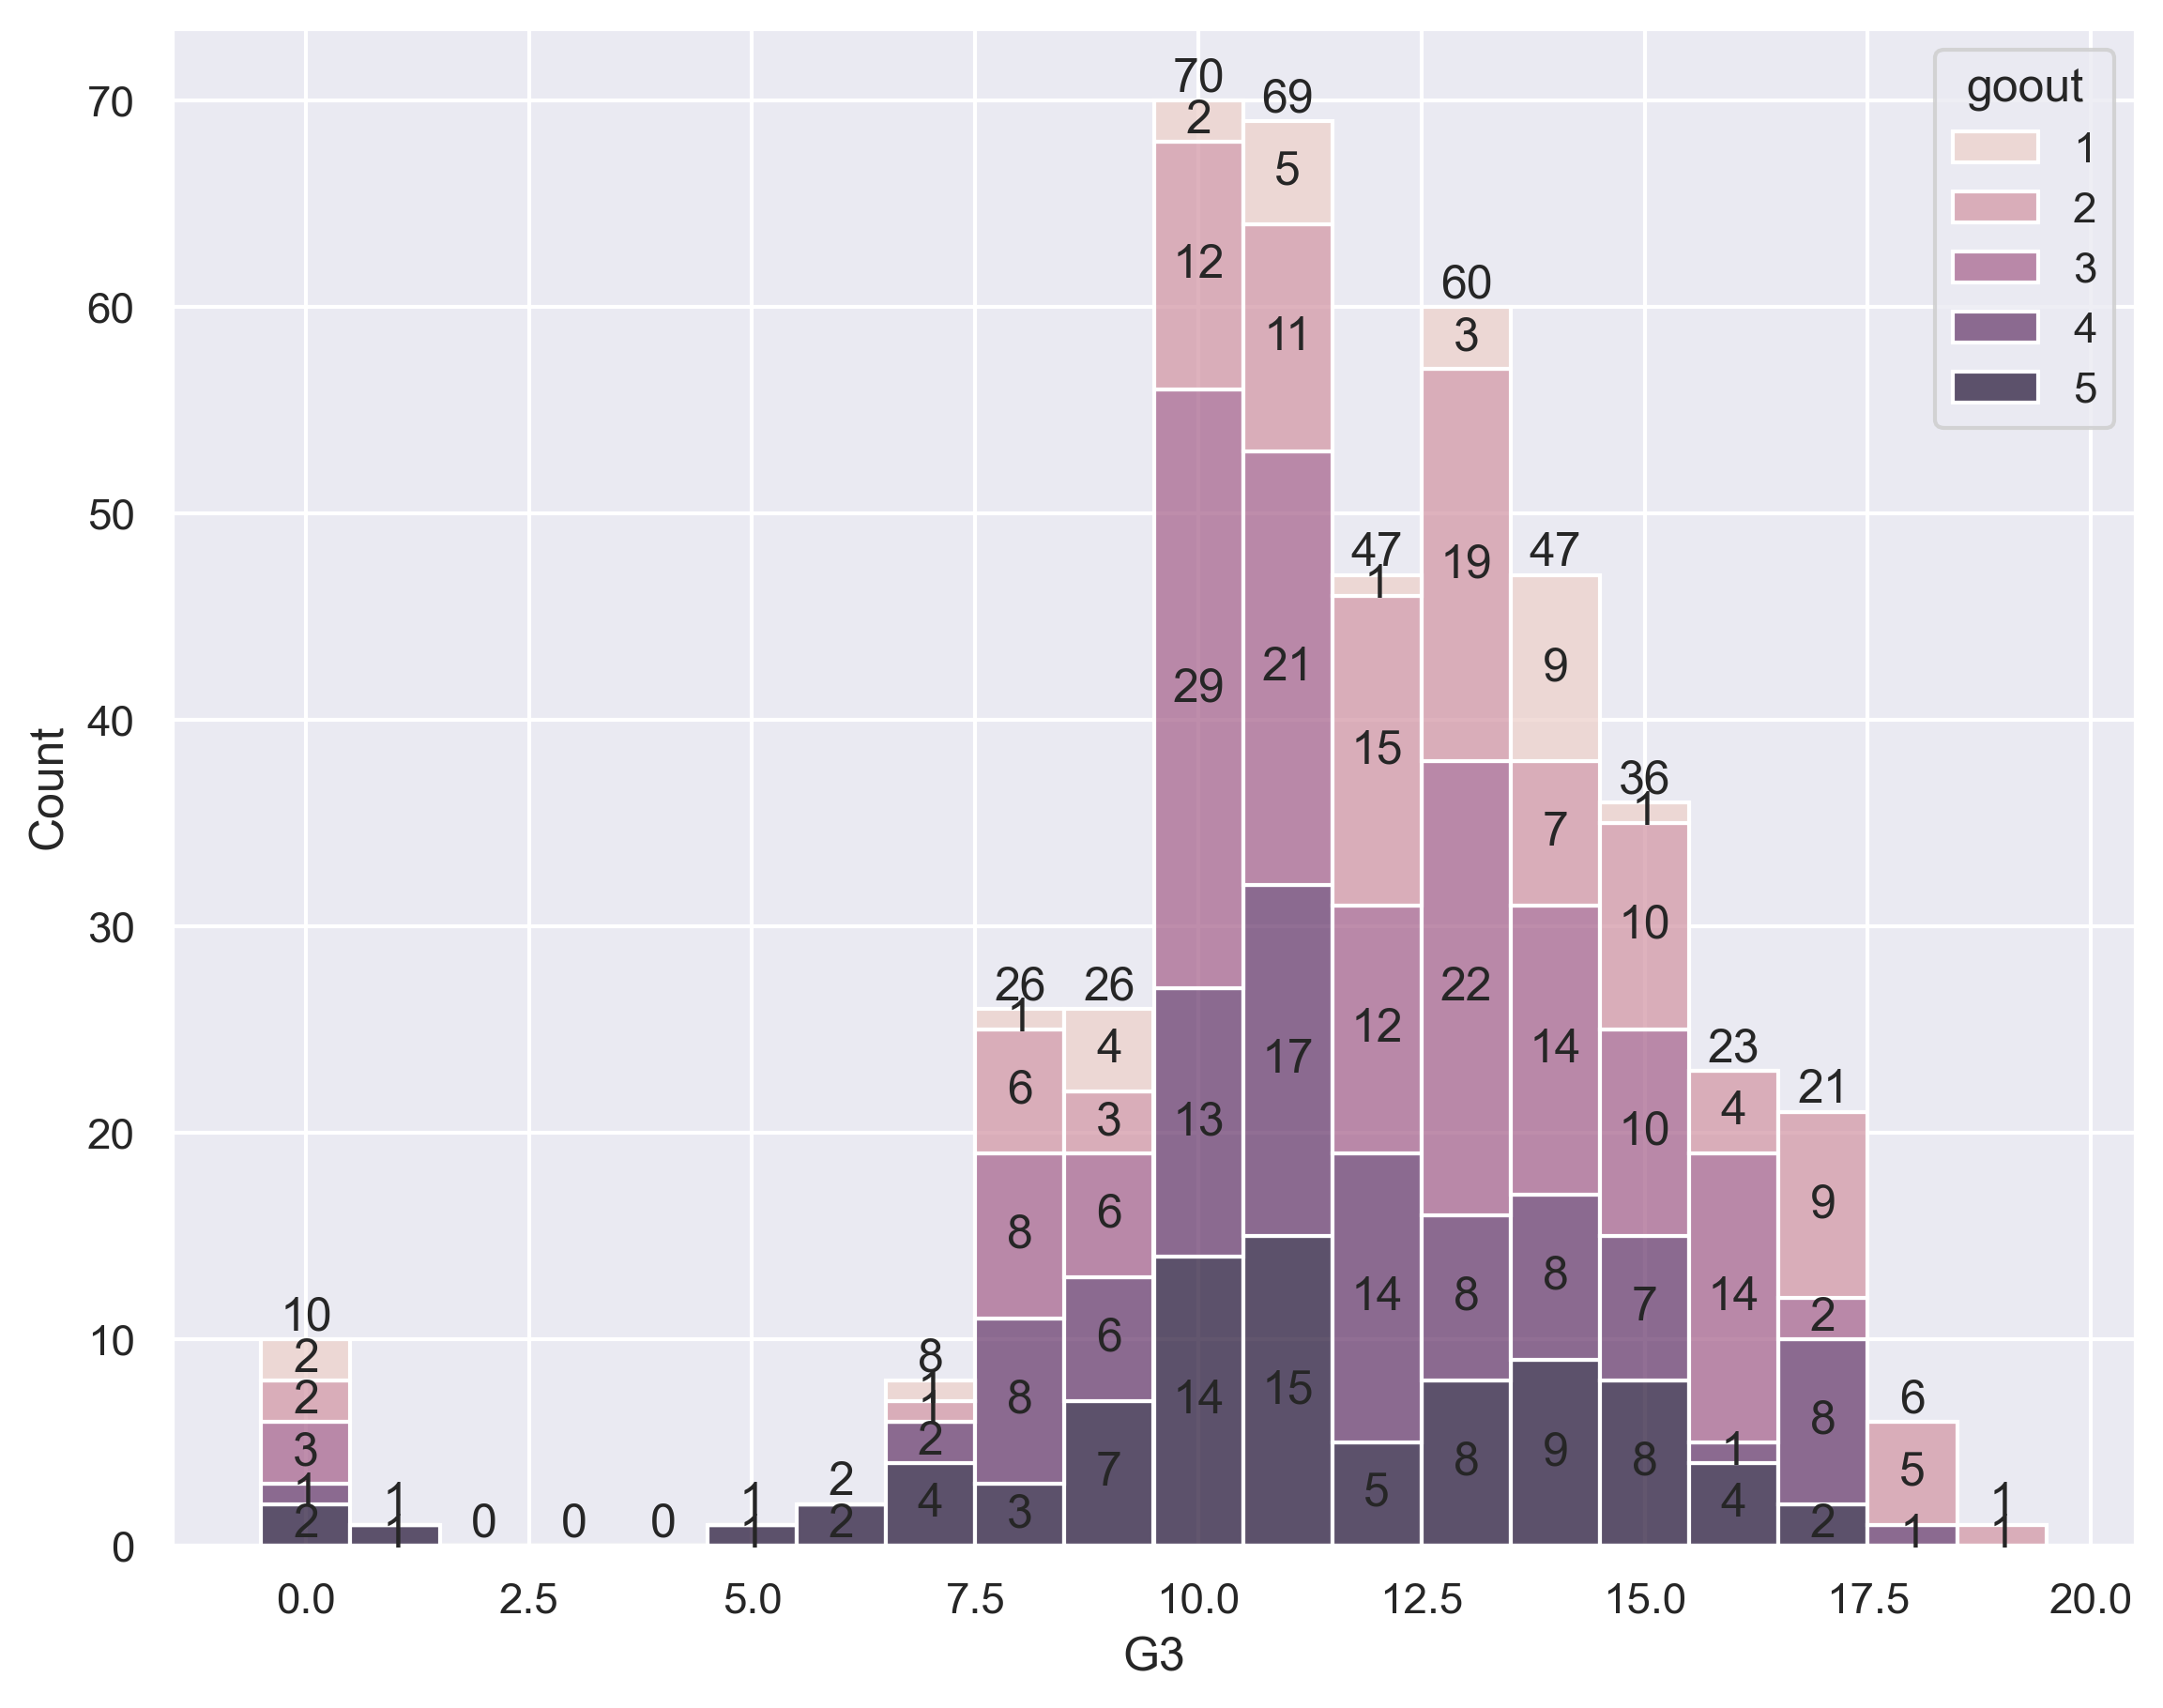

In [238]:
def visualize_histplot_for_goout():
    fig, ax = plt.subplots(figsize=(9, 7), dpi=300)
    sns.histplot(data=X_train, x='G3', hue='goout', multiple='stack', bins=8, discrete=True, ax=ax)

    for c in ax.containers:
        ax.bar_label(c, label_type='center', fmt=lambda x: "" if x == 0 else int(x))
    
    _ = ax.bar_label(ax.containers[-1])

    plt.show()


visualize_histplot_for_goout()

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

In [239]:
X_train.corr(numeric_only=True)

age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000  0.017118  0.015926   -0.045215   0.037509 -0.000269   
Medu        0.017118  1.000000  0.650052   -0.292153   0.088940 -0.172137   
Fedu        0.015926  0.650052  1.000000   -0.211014   0.077986 -0.157411   
traveltime -0.045215 -0.292153 -0.211014    1.000000  -0.084222  0.079322   
studytime   0.037509  0.088940  0.077986   -0.084222   1.000000 -0.125199   
failures   -0.000269 -0.172137 -0.157411    0.079322  -0.125199  1.000000   
famrel      0.050729  0.068827  0.086715   -0.025235  -0.024362 -0.064462   
freetime   -0.048159  0.029327  0.032968    0.003360  -0.075368  0.112960   
goout      -0.019423  0.055263  0.062423    0.008395  -0.098676  0.052652   
Dalc       -0.033190 -0.011133 -0.002507    0.078637  -0.152659  0.153152   
Walc       -0.038725 -0.021110 -0.001616    0.048305  -0.243818  0.135870   
health     -0.105574  0.045795  0.086325   -0.047959  -0.052498  0.045039   
absences   -0.026602  0.018881  0.047975   -0.041817  -0.099545  0.121685   
G3         -0.031453  0.207645  0.196666   -0.150548   0.217938 -0.407549   

              famrel  freetime     goout      Dalc      Walc    health  \
age         0.050729 -0.048159 -0.019423 -0.033190 -0.038725 -0.105574   
Medu        0.068827  0.029327  0.055263 -0.011133 -0.021110  0.045795   
Fedu        0.086715  0.032968  0.062423 -0.002507 -0.001616  0.086325   
traveltime -0.025235  0.003360  0.008395  0.078637  0.048305 -0.047959   
studytime  -0.024362 -0.075368 -0.098676 -0.152659 -0.243818 -0.052498   
failures   -0.064462  0.112960  0.052652  0.153152  0.135870  0.045039   
famrel      1.000000  0.113157  0.070991 -0.052349 -0.075185  0.111193   
freetime    0.113157  1.000000  0.359857  0.110431  0.166500  0.109172   
goout       0.070991  0.359857  1.000000  0.241739  0.421281 -0.008693   
Dalc       -0.052349  0.110431  0.241739  1.000000  0.613398  0.063682   
Walc       -0.075185  0.166500  0.421281  0.613398  1.000000  0.106020   
health      0.111193  0.109172 -0.008693  0.063682  0.106020  1.000000   
absences   -0.117433 -0.000584  0.059189  0.217312  0.178695 -0.050845   
G3          0.087383 -0.093619 -0.090558 -0.233310 -0.192491 -0.097878   

            absences        G3  
age        -0.026602 -0.031453  
Medu        0.018881  0.207645  
Fedu        0.047975  0.196666  
traveltime -0.041817 -0.150548  
studytime  -0.099545  0.217938  
failures    0.121685 -0.407549  
famrel     -0.117433  0.087383  
freetime   -0.000584 -0.093619  
goout       0.059189 -0.090558  
Dalc        0.217312 -0.233310  
Walc        0.178695 -0.192491  
health     -0.050845 -0.097878  
absences    1.000000 -0.076876  
G3         -0.076876  1.000000

## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

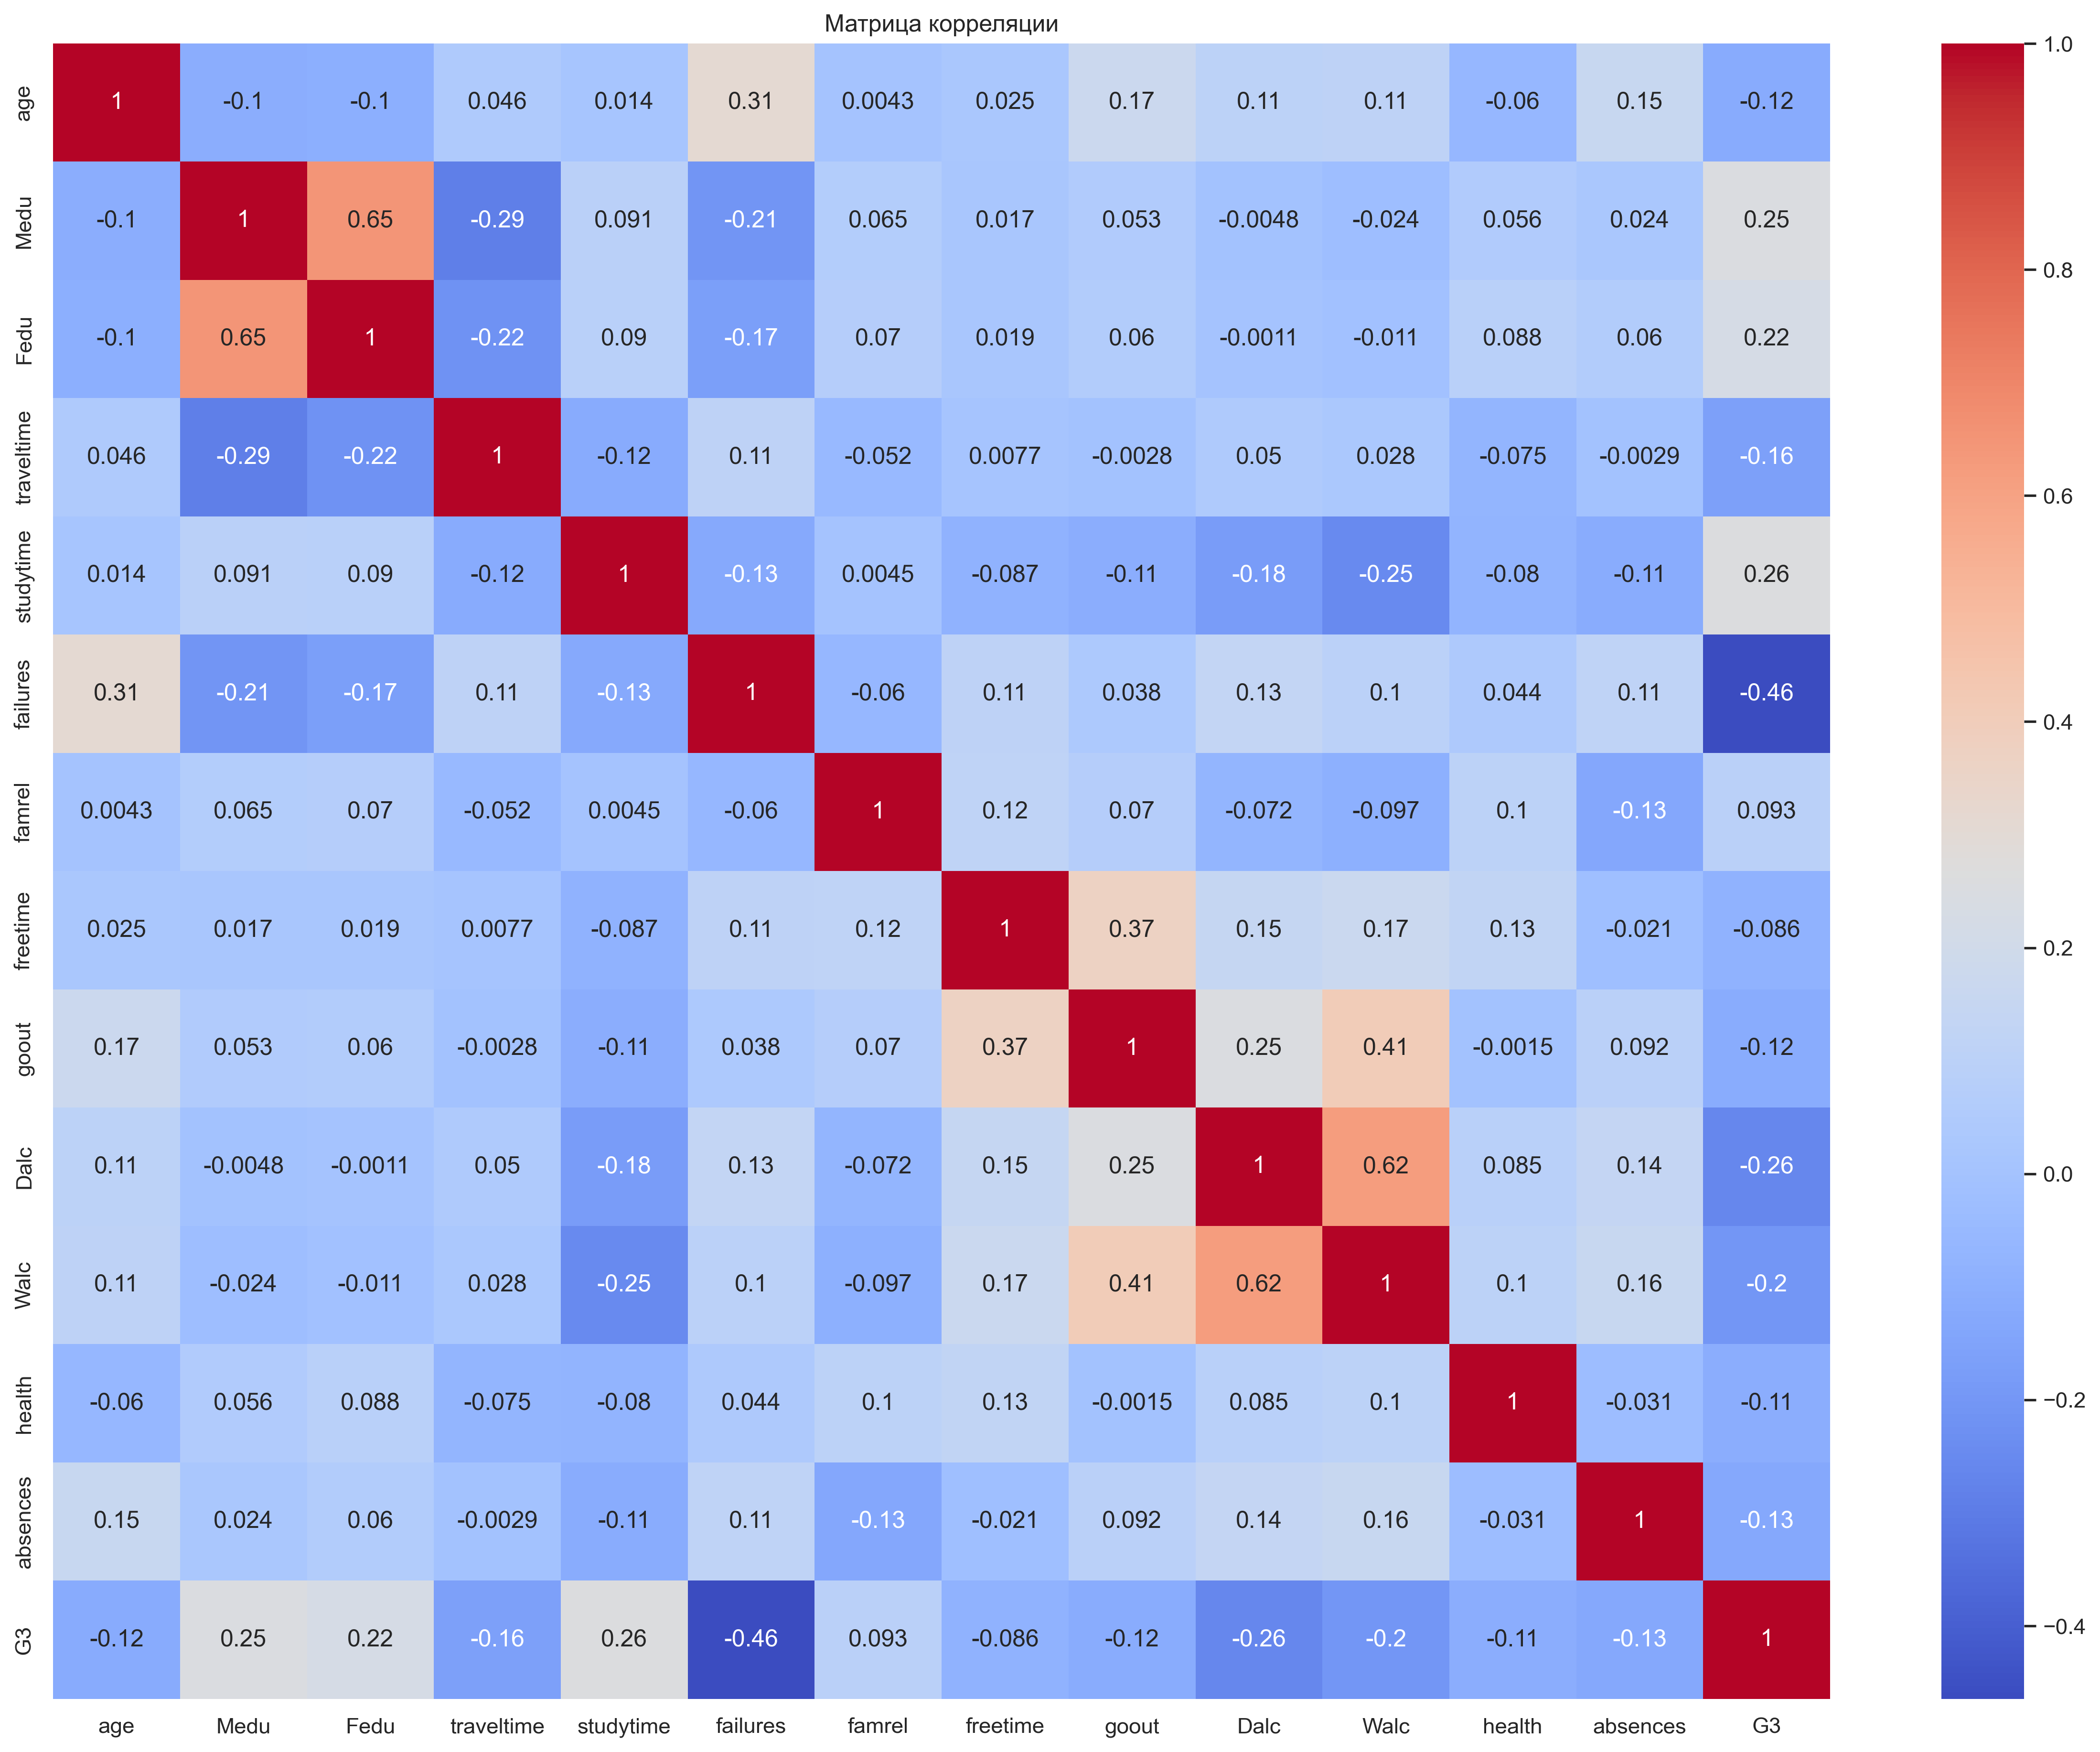

In [240]:
def show_correlation_matrix():
    fig, ax = plt.subplots(figsize=(20, 15), dpi=300)
    corr_matrix = X_train.corr(numeric_only=True, method='spearman')
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

    plt.title('Матрица корреляции')
    plt.show()


show_correlation_matrix()

## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

In [241]:
number_unique = X_train.nunique()

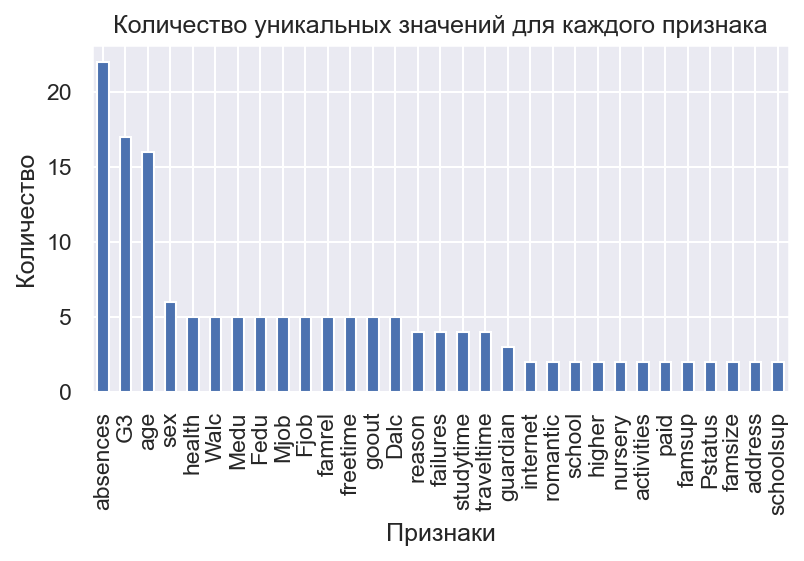

In [242]:
def show_barplot_for_count_unique_values():
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.set_title("Количество уникальных значений для каждого признака")
    ax.set_ylabel("Количество")
    ax.set_xlabel("Признаки")
    
    number_unique.sort_values(ascending=False).plot(kind='bar', ax=ax)

    plt.show()


show_barplot_for_count_unique_values()

Можно увидеть, что количество уникальный признаков для `absences` и `G3` наибольшее

## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

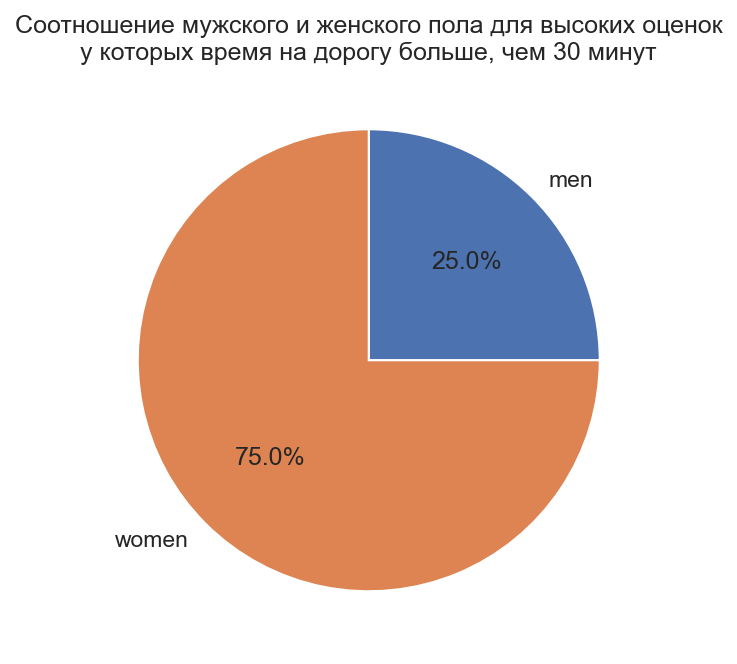

In [243]:
def show_relation_men_and_women():
    long_road = X_train[(X_train['traveltime'] == 3) | (X_train['traveltime'] == 4)]
    men = long_road[long_road['sex'] == 'M']
    women = long_road[long_road['sex'] == 'F']

    top_men = men[men['G3'] > 15]
    top_women = women[women['G3'] > 15]

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title("Соотношение мужского и женского пола для высоких оценок\nу которых время на дорогу больше, чем 30 минут")
    ax.pie([len(top_men), len(top_women)], labels=['men', 'women'], autopct='%1.1f%%')

    plt.show()
    

show_relation_men_and_women()

## Построить boxplot для оценок по возрасту.  

Я уже строил его раньше, но ладно, все равно построим, Ctrl+C и Ctrl+V сделать несложно 🥸

<Axes: xlabel='age', ylabel='G3'>

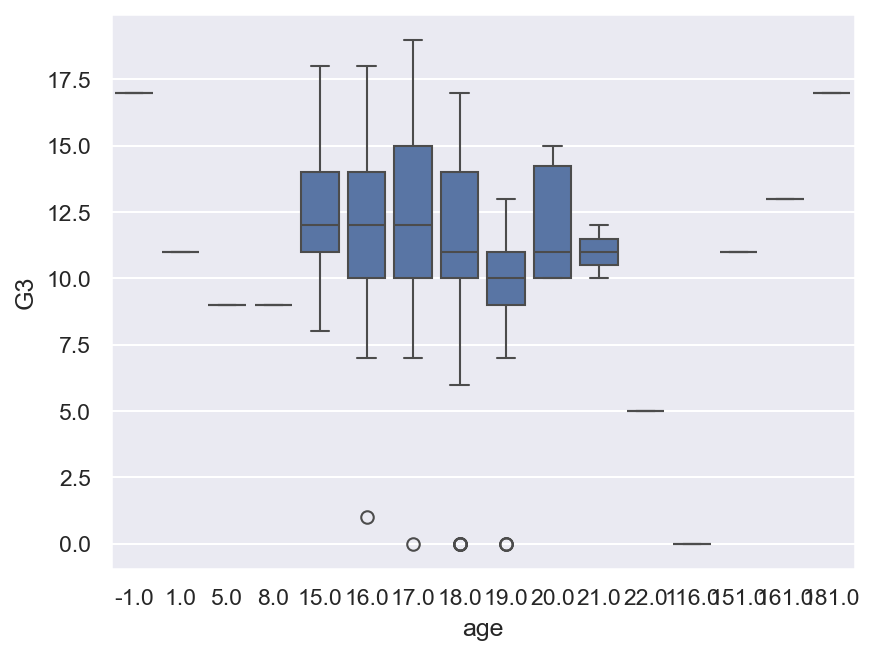

In [244]:
sns.boxplot(x='age', y='G3', data=X_train)

## Найти id топ-5 самых юных отличников.

In [245]:
X_train[X_train['G3'] > 15.0].nsmallest(5, ['age']).index.to_list()

[249, 50, 109, 112, 197]

## Для каждого возраста найдите максимальную и минимальную оценку (G3)

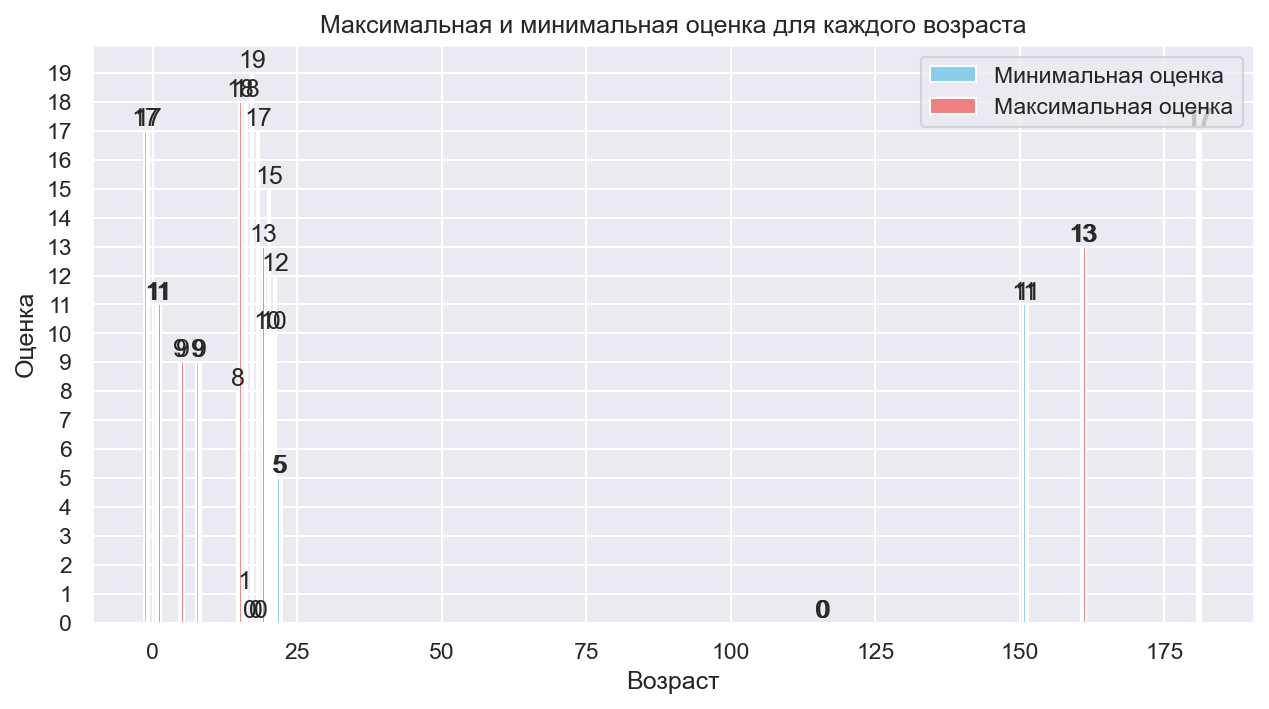

In [246]:
def show_min_and_max_grade_for_every_age():
    min_and_max = X_train.groupby('age')['G3'].agg(['min', 'max'])

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title("Максимальная и минимальная оценка для каждого возраста")
    ax.set_ylabel("Оценка")
    ax.set_xlabel("Возраст")

    ax.bar(min_and_max.index - 0.2, min_and_max['min'], width=0.4, label='Минимальная оценка', color='skyblue')
    ax.bar(min_and_max.index + 0.2, min_and_max['max'], width=0.4, label='Максимальная оценка', color='lightcoral')

    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    _ = ax.bar_label(ax.containers[-1])
    _ = ax.bar_label(ax.containers[-2])

    ax.legend()

    plt.show()


show_min_and_max_grade_for_every_age()

# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

## Найдите и исправьте ошибки в данных

## Удалите скоррелированные данные

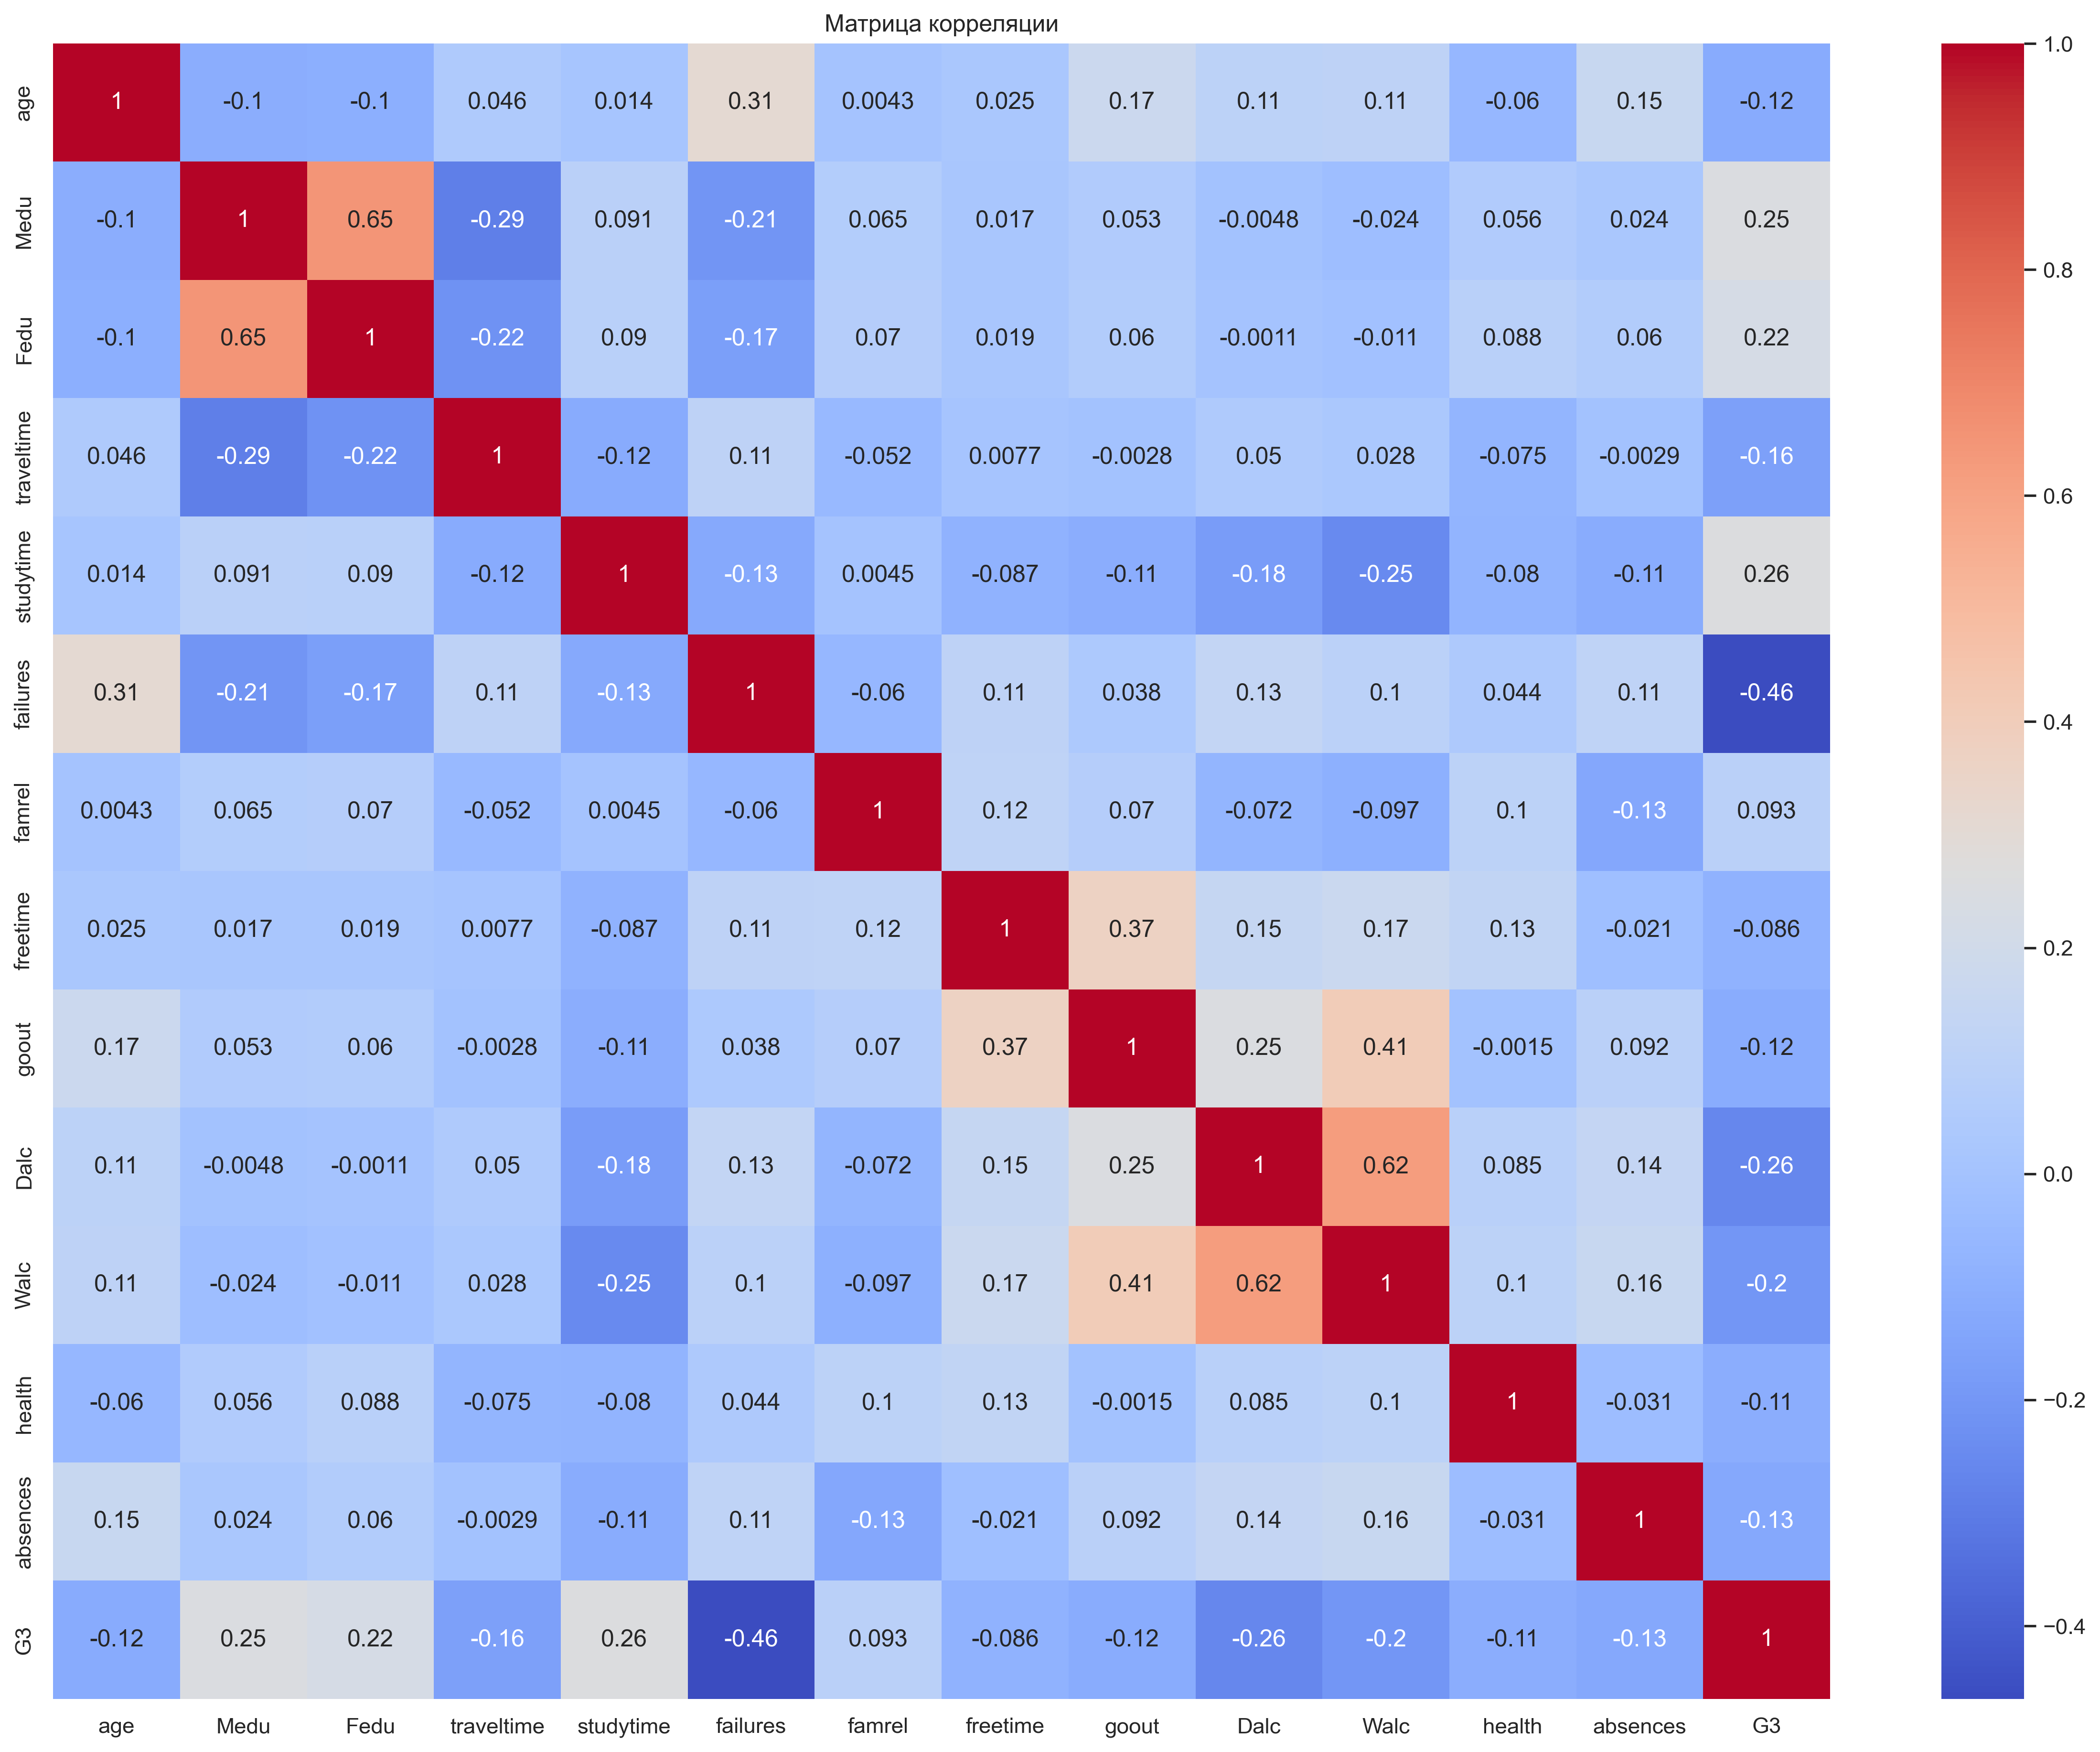

In [247]:
show_correlation_matrix()

Видим две пары коррелирующих признаков:
1. Medu и Fedu — из этой пары коррелируют с целевой переменной больше Fedu
2. Dalc и Walc — из этой переменных коррелируют с целевой переменной больше Walc
   
Следовательно, удалим Medu и Dalc

In [248]:
X_train.drop(labels=['Medu', 'Dalc'], axis=1, inplace=True)

In [249]:
X_train

school sex   age address famsize Pstatus  Fedu      Mjob      Fjob  \
0       MS   M   NaN       U     LE3       T     3   at_home  services   
1       GP   M   NaN       R     LE3       T     3   teacher     other   
2       GP   M  15.0     NaN     GT3       T     4     other     other   
3       MS   M  17.0       R     GT3       T     3  services     other   
4       GP   F  20.0       R     GT3       T     1     other     other   
..     ...  ..   ...     ...     ...     ...   ...       ...       ...   
449     GP   M  15.0       U     GT3       T     2     other     other   
450     GP   F  15.0       U     GT3       T     2     other     other   
451     GP   M  16.0       U     GT3       T     4  services  services   
452     MS   F  15.0       R     LE3       T     1   at_home  services   
453     GP   M  15.0       U     GT3       T     4  services     other   

         reason  ... higher  internet  romantic  famrel freetime goout Walc  \
0        course  ...     no       yes       yes       4        3     3    3   
1          home  ...    yes       yes        no       3        3     4    5   
2          home  ...    yes       yes        no       5        5     1    1   
3          home  ...    yes       yes       yes       4        5     5    3   
4        course  ...     no       yes       yes       1        2     3    2   
..          ...  ...    ...       ...       ...     ...      ...   ...  ...   
449      course  ...    yes       yes        no       3        3     3    1   
450      course  ...    yes       yes        no       5        1     2    1   
451      course  ...    yes       yes        no       5        3     2    2   
452  reputation  ...    yes       yes        no       5        4     3    2   
453      course  ...    yes       yes        no       5        3     3    1   

    health absences  G3  
0        3        0   9  
1        3       16  12  
2        5        0  13  
3        2        4  11  
4        2        8  12  
..     ...      ...  ..  
449      3        0  10  
450      3        4  10  
451      5        4  15  
452      4        0  10  
453      5        2  12  

[454 rows x 29 columns]

# Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

Заполнил пропуски ранее, потому что как проводить исследования с странным датасетом?

## Закодируйте категориальные признаки

In [250]:
from sklearn.preprocessing import TargetEncoder

In [251]:
X = X_train.select_dtypes(include=['object'])
y = X_train['G3']

encoder = TargetEncoder()


## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.

# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

In [252]:
# Ваш код

## Разделите данные и объясните выбор стратегии

In [253]:
# Ваш код

__Ваш ответ:__ ...

# Часть 4. Заполнение пропусков в данных

## Фильтрация по диапазону значений

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите ```NaN```.

In [254]:
# Ваш код

## Адаптивное заполнения пропусков

Реализуйте стратегию заполнения пропусков данных на основе схожих примеров. Обучите один из известных вам алгоритмов (knn, Naive Bayes, linear regression) для предсказания той характеристики, пропуски которой присутсвуют в данных. В качестве характеристики для обучения алгоритмов __нельзя__ использовать ```G3```.

In [255]:
# Ваш код

# Часть 5. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

## KNN

## Bayes

## Регрессия

## SVM

## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.

Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.

## Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в ```data/sample_submission.csv```. Данные для предсказания - ```X_test.csv```.

За лучшее предсказание 5 человек получат +10% к домашке.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.

In [256]:
# Для jupyter notebook

submission = pd.read_csv('data/sample_submission.csv', index_col='id')
submission['G3'] = 1 # ваше предсказание
submission.to_csv('data/submission.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/sample_submission.csv'

In [ ]:
# Для colab notebook

from google.colab import files

pd.read_csv('data/sample_submission.csv', index_col='id')
submission['G3'] = 1 # ваше предсказание
submission.to_csv('data/submission.csv', index=False)
files.download('data/submission.csv')

# Часть 6. Состязательная валидация (Adversarial Validation)

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:
- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (```is_test```) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение ```is_test = 1```, а у тренировочных ```is_test = 0```.
4. Учим алгоритм классификации предсказывать заданную метку ```is_test```.
5. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.